In [163]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob
import os
# Define dataset path
data_dir = "/Users/niklasviebig/Desktop/STARTxHack/Datasets_Hackathon/Climate_Precipitation_Data"


# Reading in Climate_Precipitation_Data

The dataset contains TIFF (.tif) files along with metadata files (.xml, .aux.xml, .tfw). 

1. TIFF Files (.tif)
	•	Format: GeoTIFF (a geospatial raster file format).
	•	Data: Stores precipitation values for each pixel in a grid.
	•	Structure:
	•	Raster grid: The image is divided into cells (pixels), each representing precipitation in mm/year.
	•	Bands: A single-band raster (likely in your case) where each pixel value represents precipitation.
	•	Spatial information: Contains georeferencing details (coordinates, projection, resolution).

2. World Files (.tfw)
	•	Purpose: Helps georeference the .tif file.
	•	Contents: Contains six lines defining scale, rotation, and location.

3. Metadata Files (.xml, .aux.xml)
	•	Purpose: Store metadata related to the .tif file.
	•	Contents: Information on the coordinate reference system (CRS), statistics, and processing history.

In [164]:
# Define dataset path
data_dir = "/Users/niklasviebig/Desktop/STARTxHack/Datasets_Hackathon/Climate_Precipitation_Data"

# Get all .tif files
tif_files = sorted([f for f in os.listdir(data_dir) if f.endswith(".tif")])

data_list = []

for tif in tif_files:
    year = int(tif[:4])  # Extract year from filename
    file_path = os.path.join(data_dir, tif)

    with rasterio.open(file_path) as dataset:
        print(f"Number of bands: {dataset.count}")
        data = dataset.read(1)  # Read the first band (2D array)
        
        # Print basic stats
        print(f"Year: {year}")
        print(f"Min: {np.nanmin(data)}, Max: {np.nanmax(data)}")
        print(f"Shape of data: {data.shape}\n")
        
        # Handle no-data values (-3.4028234663852886e+38)
        no_data_value = dataset.nodata
        if no_data_value is not None:
            data[data == no_data_value] = np.nan  # Convert no-data to NaN

        mean_precip = np.nanmean(data)  # Compute mean precipitation, ignoring NaNs

    data_list.append({"Year": year, "Mean_Precip_mm": mean_precip})

# Convert to DataFrame
precip_df = pd.DataFrame(data_list)


Number of bands: 1
Year: 2010
Min: -3.4028234663852886e+38, Max: 500.84423828125
Shape of data: (65, 46)

Number of bands: 1
Year: 2011
Min: -3.4028234663852886e+38, Max: 367.0052185058594
Shape of data: (65, 46)

Number of bands: 1
Year: 2012
Min: -3.4028234663852886e+38, Max: 609.3837890625
Shape of data: (65, 46)

Number of bands: 1
Year: 2013
Min: -3.4028234663852886e+38, Max: 484.1578369140625
Shape of data: (65, 46)

Number of bands: 1
Year: 2014
Min: -3.4028234663852886e+38, Max: 440.318359375
Shape of data: (65, 46)

Number of bands: 1
Year: 2015
Min: -3.4028234663852886e+38, Max: 500.3486633300781
Shape of data: (65, 46)

Number of bands: 1
Year: 2016
Min: -3.4028234663852886e+38, Max: 578.6300048828125
Shape of data: (65, 46)

Number of bands: 1
Year: 2017
Min: -3.4028234663852886e+38, Max: 415.6153564453125
Shape of data: (65, 46)

Number of bands: 1
Year: 2018
Min: -3.4028234663852886e+38, Max: 542.1778564453125
Shape of data: (65, 46)

Number of bands: 1
Year: 2019
Min: -3

In [165]:
precip_df

,Year,Mean_Precip_mm
0,2010,358.480469
1,2011,200.431107
2,2012,351.676025
3,2013,261.263092
4,2014,236.406708
5,2015,245.469055
6,2016,295.838470
7,2017,226.643814
8,2018,256.811310
9,2019,187.799301


Number of bands: 1
Year: 2010
Min: -3.4028234663852886e+38, Max: 500.84423828125
Shape of data: (65, 46)



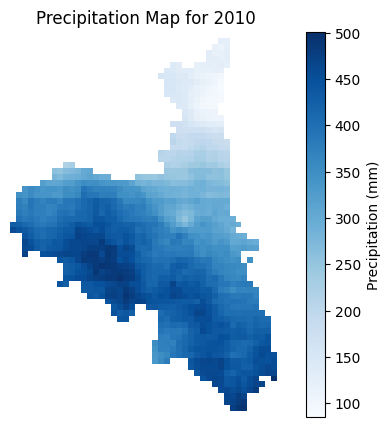

Number of bands: 1
Year: 2011
Min: -3.4028234663852886e+38, Max: 367.0052185058594
Shape of data: (65, 46)



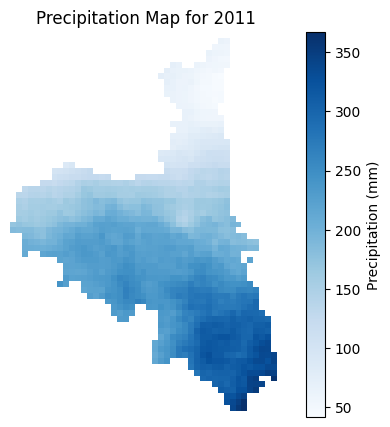

Number of bands: 1
Year: 2012
Min: -3.4028234663852886e+38, Max: 609.3837890625
Shape of data: (65, 46)



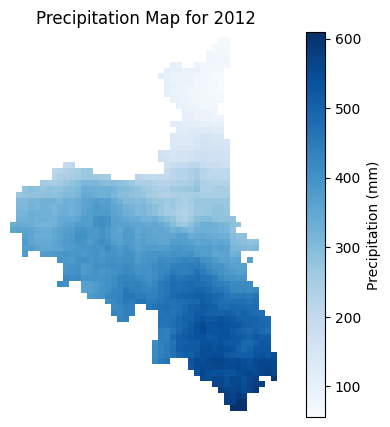

Number of bands: 1
Year: 2013
Min: -3.4028234663852886e+38, Max: 484.1578369140625
Shape of data: (65, 46)



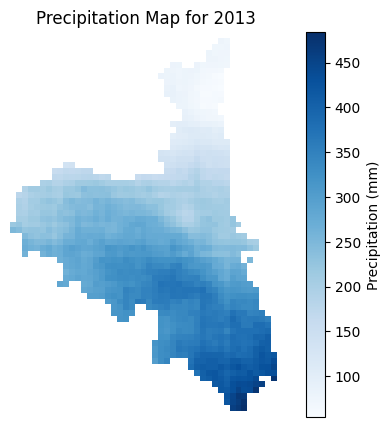

Number of bands: 1
Year: 2014
Min: -3.4028234663852886e+38, Max: 440.318359375
Shape of data: (65, 46)



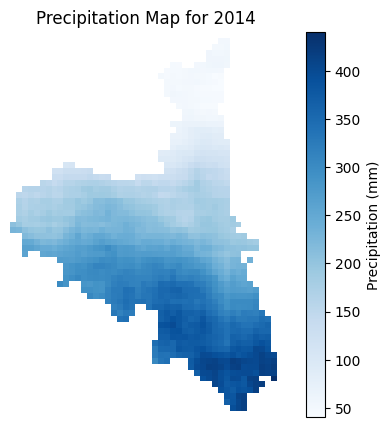

Number of bands: 1
Year: 2015
Min: -3.4028234663852886e+38, Max: 500.3486633300781
Shape of data: (65, 46)



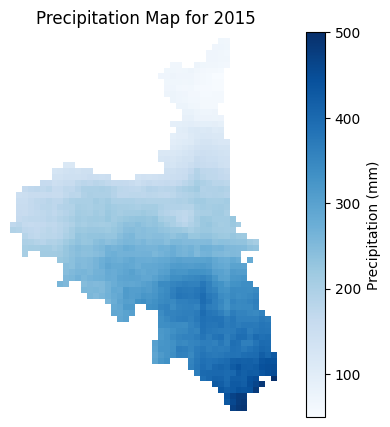

Number of bands: 1
Year: 2016
Min: -3.4028234663852886e+38, Max: 578.6300048828125
Shape of data: (65, 46)



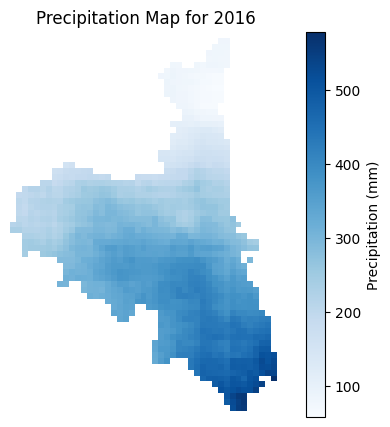

Number of bands: 1
Year: 2017
Min: -3.4028234663852886e+38, Max: 415.6153564453125
Shape of data: (65, 46)



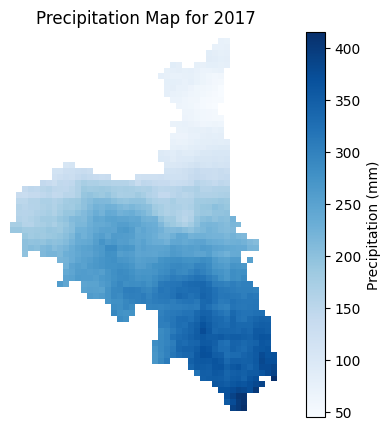

Number of bands: 1
Year: 2018
Min: -3.4028234663852886e+38, Max: 542.1778564453125
Shape of data: (65, 46)



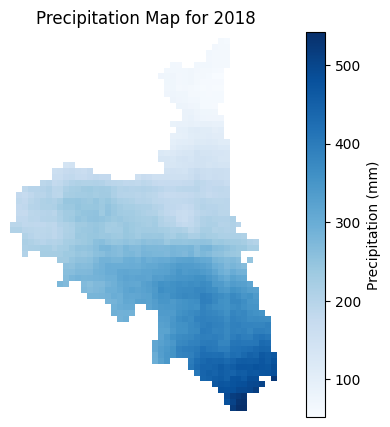

Number of bands: 1
Year: 2019
Min: -3.4028234663852886e+38, Max: 442.896484375
Shape of data: (65, 46)



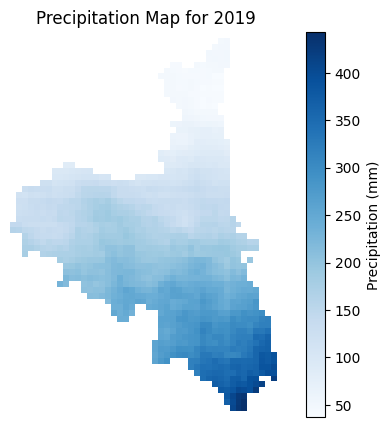

Number of bands: 1
Year: 2020
Min: -3.4028234663852886e+38, Max: 690.9547729492188
Shape of data: (65, 46)



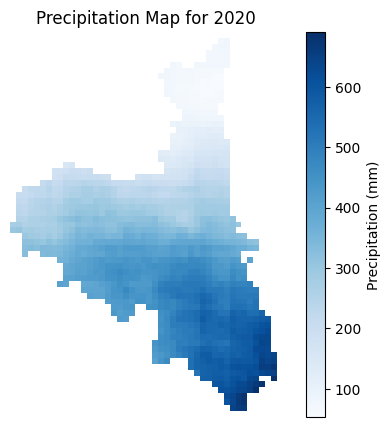

Number of bands: 1
Year: 2021
Min: -3.4028234663852886e+38, Max: 441.8268127441406
Shape of data: (65, 46)



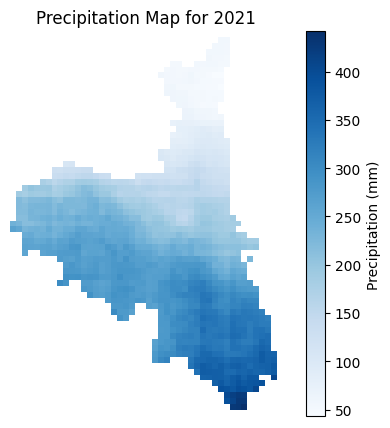

Number of bands: 1
Year: 2022
Min: -3.4028234663852886e+38, Max: 566.6293334960938
Shape of data: (65, 46)



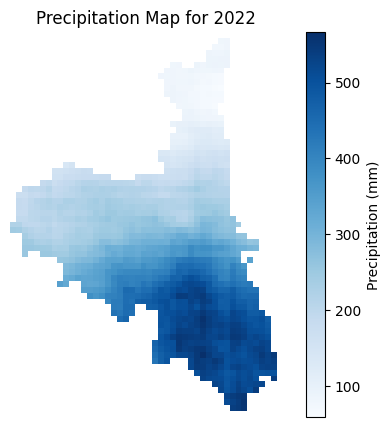

Number of bands: 1
Year: 2023
Min: -3.4028234663852886e+38, Max: 511.3251953125
Shape of data: (65, 46)



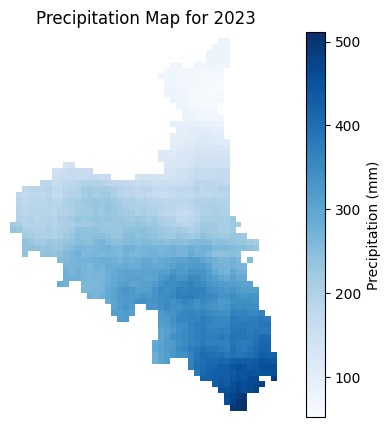

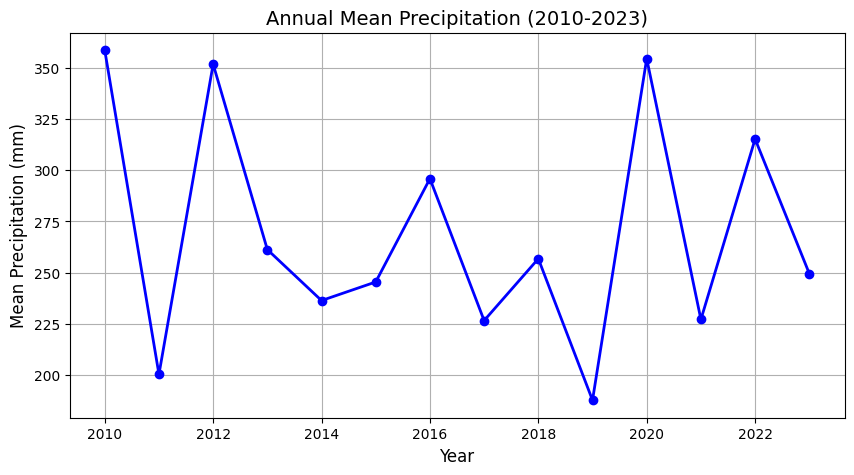

In [166]:
# Get all .tif files
tif_files = sorted([f for f in os.listdir(data_dir) if f.endswith(".tif")])

data_list = []

for tif in tif_files:
    year = int(tif[:4])  # Extract year from filename
    file_path = os.path.join(data_dir, tif)

    with rasterio.open(file_path) as dataset:
        print(f"Number of bands: {dataset.count}")
        data = dataset.read(1)  # Read the first band (2D array)
        
        # Print basic stats
        print(f"Year: {year}")
        print(f"Min: {np.nanmin(data)}, Max: {np.nanmax(data)}")
        print(f"Shape of data: {data.shape}\n")
        
        # Handle no-data values (-3.4028234663852886e+38)
        no_data_value = dataset.nodata
        if no_data_value is not None:
            data[data == no_data_value] = np.nan  # Convert no-data to NaN

        mean_precip = np.nanmean(data)  # Compute mean precipitation, ignoring NaNs
        data_list.append({"Year": year, "Mean_Precip_mm": mean_precip})
        
        # Visualize each precipitation map
        plt.figure(figsize=(6, 5))
        plt.imshow(data, cmap="Blues", interpolation='nearest')
        plt.colorbar(label="Precipitation (mm)")
        plt.title(f"Precipitation Map for {year}")
        plt.axis("off")
        plt.show()

# Convert to DataFrame
precip_df = pd.DataFrame(data_list)

# Plot the mean precipitation over the years
plt.figure(figsize=(10, 5))
plt.plot(precip_df["Year"], precip_df["Mean_Precip_mm"], marker="o", linestyle="-", linewidth=2, color="b")

# Labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mean Precipitation (mm)", fontsize=12)
plt.title("Annual Mean Precipitation (2010-2023)", fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

Number of bands: 1
Year: 2010
Min: -3.4028234663852886e+38, Max: 500.84423828125
Shape of data: (65, 46)



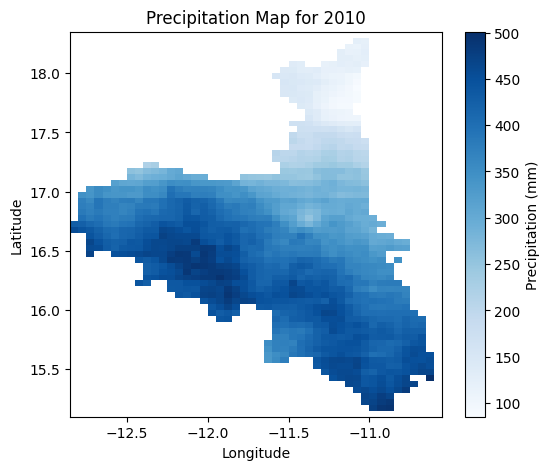

Number of bands: 1
Year: 2011
Min: -3.4028234663852886e+38, Max: 367.0052185058594
Shape of data: (65, 46)



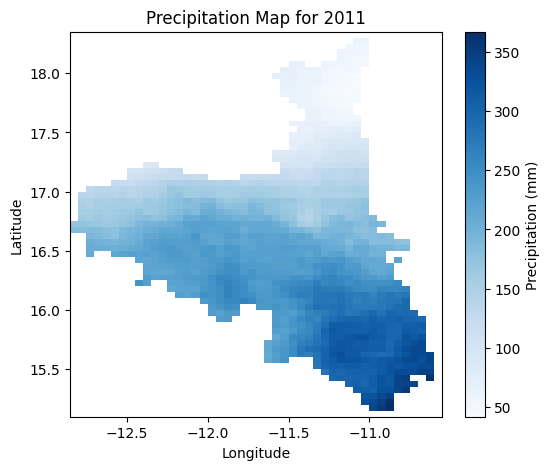

Number of bands: 1
Year: 2012
Min: -3.4028234663852886e+38, Max: 609.3837890625
Shape of data: (65, 46)



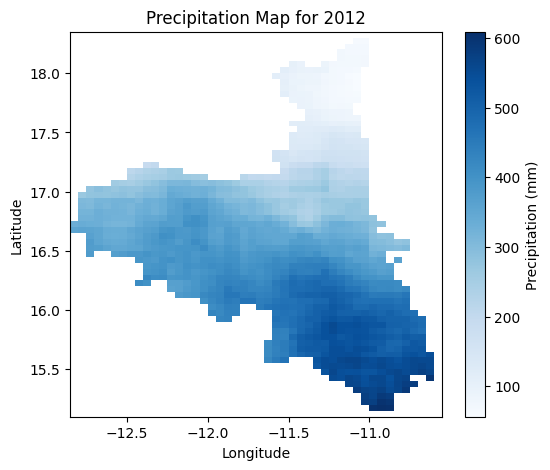

Number of bands: 1
Year: 2013
Min: -3.4028234663852886e+38, Max: 484.1578369140625
Shape of data: (65, 46)



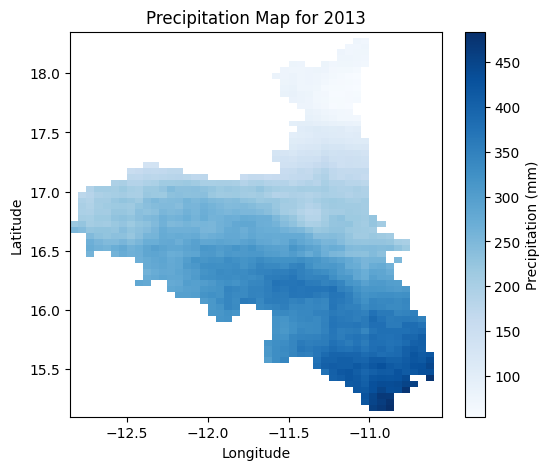

Number of bands: 1
Year: 2014
Min: -3.4028234663852886e+38, Max: 440.318359375
Shape of data: (65, 46)



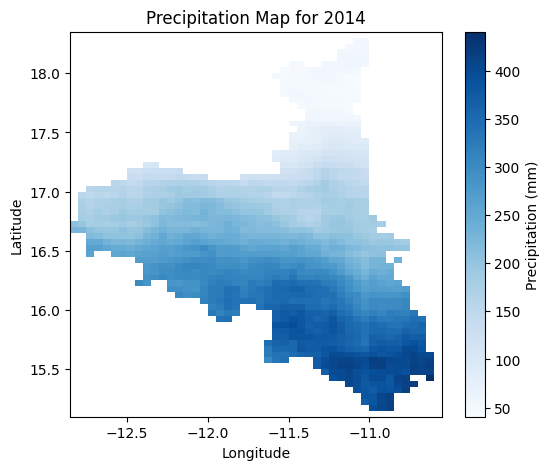

Number of bands: 1
Year: 2015
Min: -3.4028234663852886e+38, Max: 500.3486633300781
Shape of data: (65, 46)



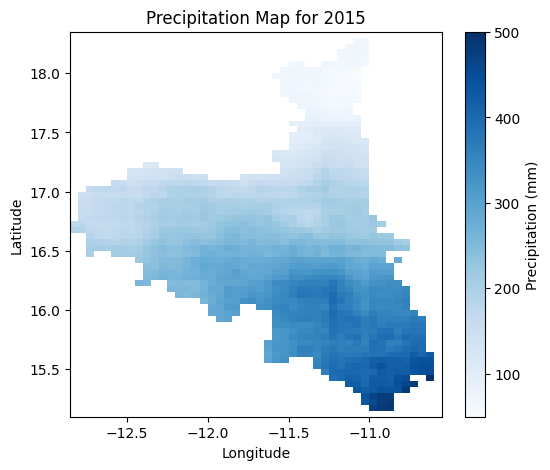

Number of bands: 1
Year: 2016
Min: -3.4028234663852886e+38, Max: 578.6300048828125
Shape of data: (65, 46)



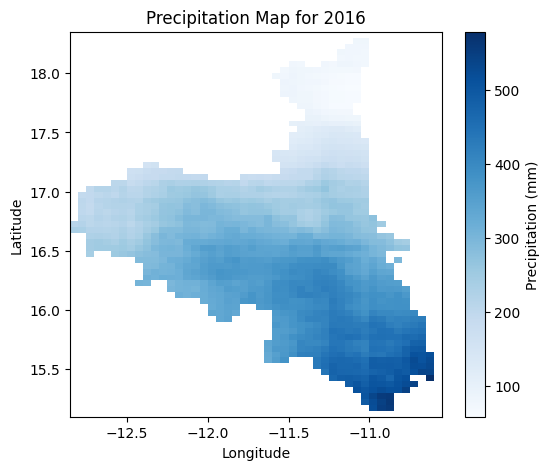

Number of bands: 1
Year: 2017
Min: -3.4028234663852886e+38, Max: 415.6153564453125
Shape of data: (65, 46)



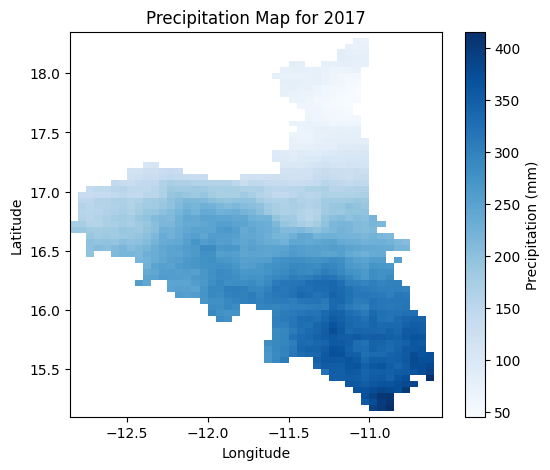

Number of bands: 1
Year: 2018
Min: -3.4028234663852886e+38, Max: 542.1778564453125
Shape of data: (65, 46)



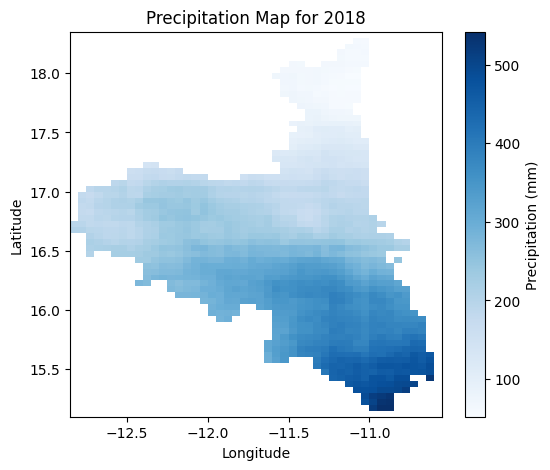

Number of bands: 1
Year: 2019
Min: -3.4028234663852886e+38, Max: 442.896484375
Shape of data: (65, 46)



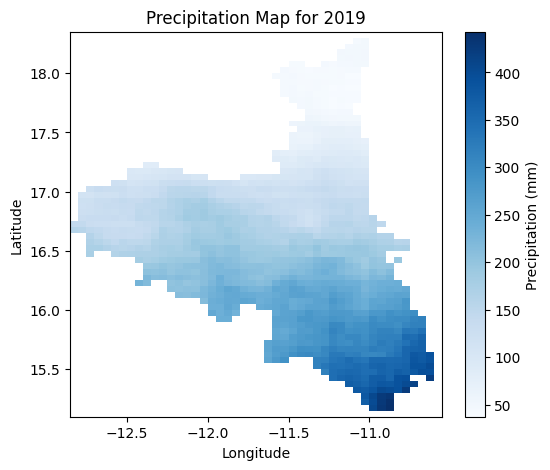

Number of bands: 1
Year: 2020
Min: -3.4028234663852886e+38, Max: 690.9547729492188
Shape of data: (65, 46)



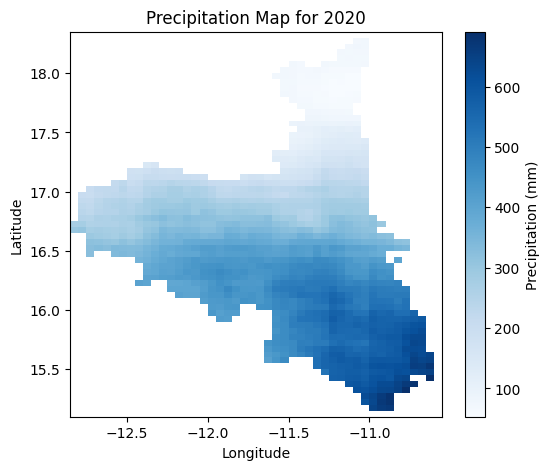

Number of bands: 1
Year: 2021
Min: -3.4028234663852886e+38, Max: 441.8268127441406
Shape of data: (65, 46)



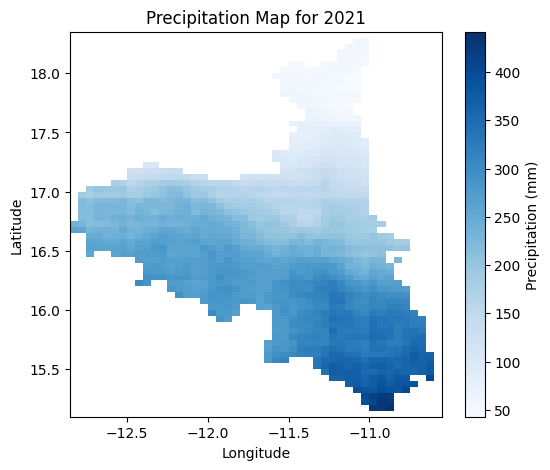

Number of bands: 1
Year: 2022
Min: -3.4028234663852886e+38, Max: 566.6293334960938
Shape of data: (65, 46)



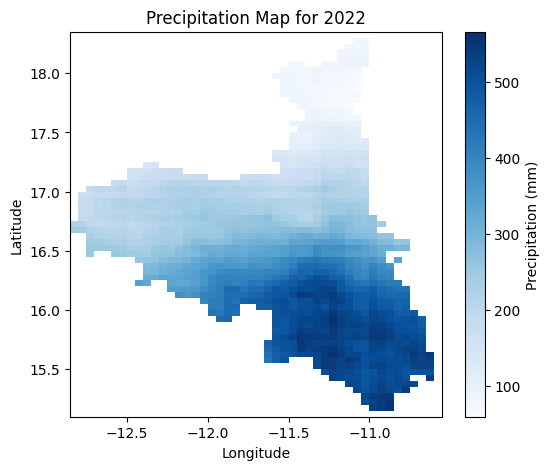

Number of bands: 1
Year: 2023
Min: -3.4028234663852886e+38, Max: 511.3251953125
Shape of data: (65, 46)



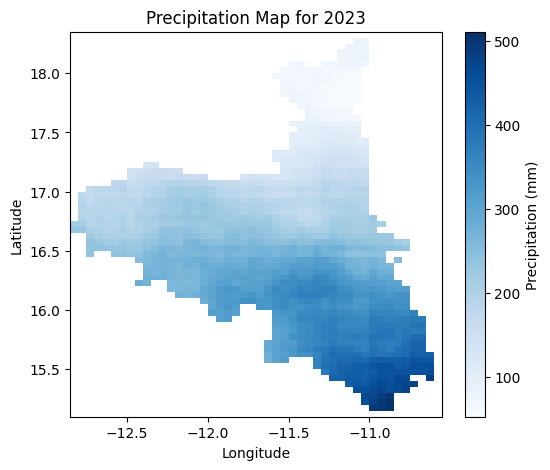

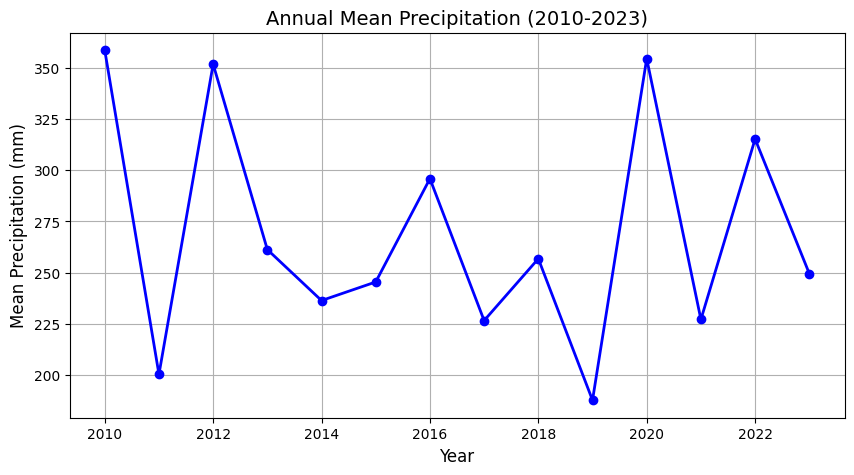

In [167]:
from rasterio.transform import xy

# Define dataset path
data_dir = "/Users/niklasviebig/Desktop/STARTxHack/Datasets_Hackathon/Climate_Precipitation_Data"

# Get all .tif files
tif_files = sorted([f for f in os.listdir(data_dir) if f.endswith(".tif")])

data_list = []

for tif in tif_files:
    year = int(tif[:4])  # Extract year from filename
    file_path = os.path.join(data_dir, tif)

    with rasterio.open(file_path) as dataset:
        print(f"Number of bands: {dataset.count}")
        data = dataset.read(1)  # Read the first band (2D array)
        transform = dataset.transform  # Get geotransformation matrix
        
        # Print basic stats
        print(f"Year: {year}")
        print(f"Min: {np.nanmin(data)}, Max: {np.nanmax(data)}")
        print(f"Shape of data: {data.shape}\n")
        
        # Handle no-data values (-3.4028234663852886e+38)
        no_data_value = dataset.nodata
        if no_data_value is not None:
            data[data == no_data_value] = np.nan  # Convert no-data to NaN

        mean_precip = np.nanmean(data)  # Compute mean precipitation, ignoring NaNs
        data_list.append({"Year": year, "Mean_Precip_mm": mean_precip})
        
        # Generate latitude & longitude grids
        height, width = data.shape
        row_indices, col_indices = np.meshgrid(np.arange(height), np.arange(width), indexing="ij")
        
        # Convert row/col indices to latitude & longitude
        lon, lat = rasterio.transform.xy(transform, row_indices, col_indices)
        lon = np.array(lon).reshape(data.shape)
        lat = np.array(lat).reshape(data.shape)

        # Visualize each precipitation map with coordinates
        plt.figure(figsize=(6, 5))
        plt.pcolormesh(lon, lat, data, cmap="Blues", shading="auto")
        plt.colorbar(label="Precipitation (mm)")
        plt.title(f"Precipitation Map for {year}")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()

# Convert to DataFrame
precip_df = pd.DataFrame(data_list)

# Plot the mean precipitation over the years
plt.figure(figsize=(10, 5))
plt.plot(precip_df["Year"], precip_df["Mean_Precip_mm"], marker="o", linestyle="-", linewidth=2, color="b")

# Labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mean Precipitation (mm)", fontsize=12)
plt.title("Annual Mean Precipitation (2010-2023)", fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

Number of bands: 1
Year: 2010
Min: -3.4028234663852886e+38, Max: 500.84423828125
Shape of data: (65, 46)

TFW Transform: | 0.05, 0.00,-12.82|
| 0.00,-0.05, 18.32|
| 0.00, 0.00, 1.00|
Rasterio Transform: | 0.05, 0.00,-12.85|
| 0.00,-0.05, 18.35|
| 0.00, 0.00, 1.00|

Extracted Metadata for 2010: {}



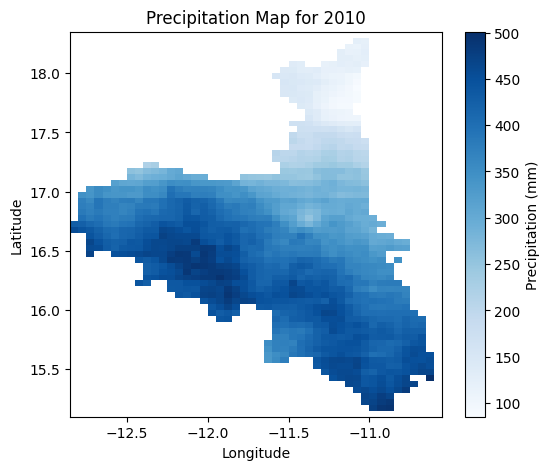

Number of bands: 1
Year: 2011
Min: -3.4028234663852886e+38, Max: 367.0052185058594
Shape of data: (65, 46)

TFW Transform: | 0.05, 0.00,-12.82|
| 0.00,-0.05, 18.32|
| 0.00, 0.00, 1.00|
Rasterio Transform: | 0.05, 0.00,-12.85|
| 0.00,-0.05, 18.35|
| 0.00, 0.00, 1.00|

Extracted Metadata for 2011: {}



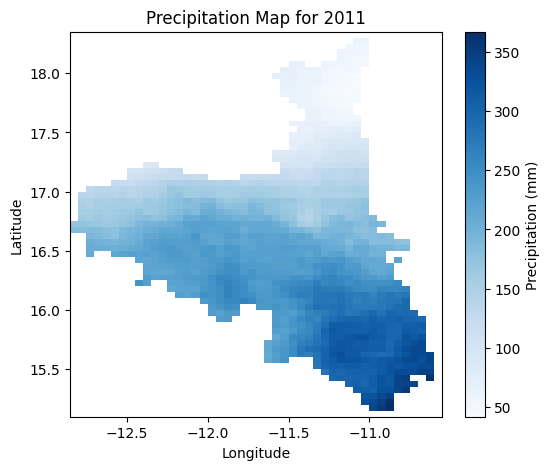

Number of bands: 1
Year: 2012
Min: -3.4028234663852886e+38, Max: 609.3837890625
Shape of data: (65, 46)

TFW Transform: | 0.05, 0.00,-12.82|
| 0.00,-0.05, 18.32|
| 0.00, 0.00, 1.00|
Rasterio Transform: | 0.05, 0.00,-12.85|
| 0.00,-0.05, 18.35|
| 0.00, 0.00, 1.00|

Extracted Metadata for 2012: {}



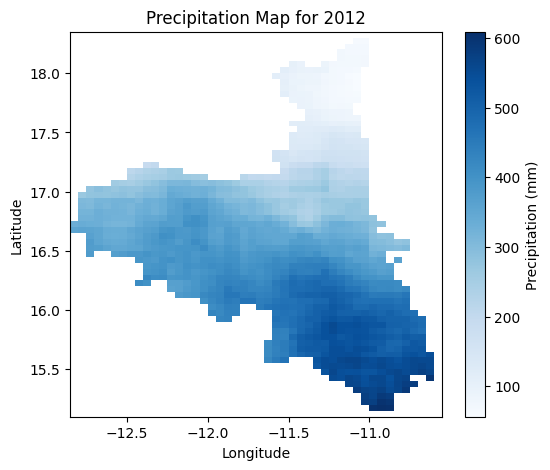

Number of bands: 1
Year: 2013
Min: -3.4028234663852886e+38, Max: 484.1578369140625
Shape of data: (65, 46)

TFW Transform: | 0.05, 0.00,-12.82|
| 0.00,-0.05, 18.32|
| 0.00, 0.00, 1.00|
Rasterio Transform: | 0.05, 0.00,-12.85|
| 0.00,-0.05, 18.35|
| 0.00, 0.00, 1.00|

Extracted Metadata for 2013: {}



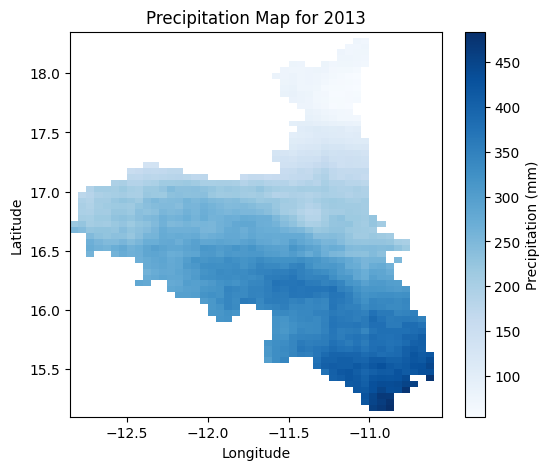

Number of bands: 1
Year: 2014
Min: -3.4028234663852886e+38, Max: 440.318359375
Shape of data: (65, 46)

TFW Transform: | 0.05, 0.00,-12.82|
| 0.00,-0.05, 18.32|
| 0.00, 0.00, 1.00|
Rasterio Transform: | 0.05, 0.00,-12.85|
| 0.00,-0.05, 18.35|
| 0.00, 0.00, 1.00|

Extracted Metadata for 2014: {}



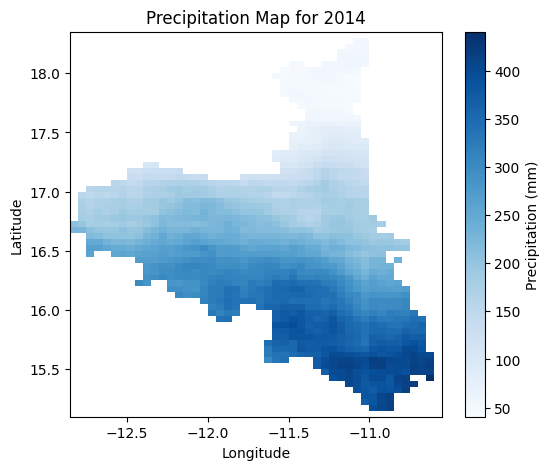

Number of bands: 1
Year: 2015
Min: -3.4028234663852886e+38, Max: 500.3486633300781
Shape of data: (65, 46)

TFW Transform: | 0.05, 0.00,-12.82|
| 0.00,-0.05, 18.32|
| 0.00, 0.00, 1.00|
Rasterio Transform: | 0.05, 0.00,-12.85|
| 0.00,-0.05, 18.35|
| 0.00, 0.00, 1.00|

Extracted Metadata for 2015: {}



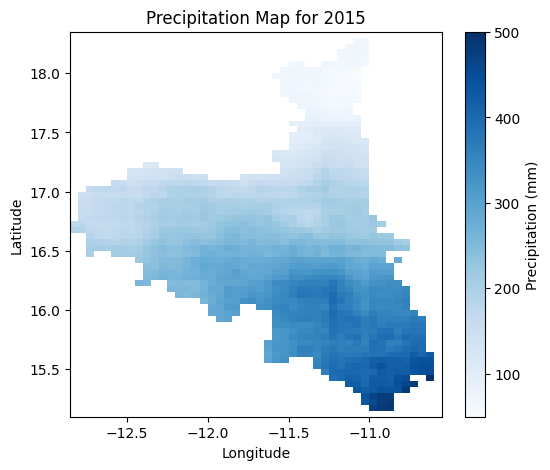

Number of bands: 1
Year: 2016
Min: -3.4028234663852886e+38, Max: 578.6300048828125
Shape of data: (65, 46)

TFW Transform: | 0.05, 0.00,-12.82|
| 0.00,-0.05, 18.32|
| 0.00, 0.00, 1.00|
Rasterio Transform: | 0.05, 0.00,-12.85|
| 0.00,-0.05, 18.35|
| 0.00, 0.00, 1.00|

Extracted Metadata for 2016: {}



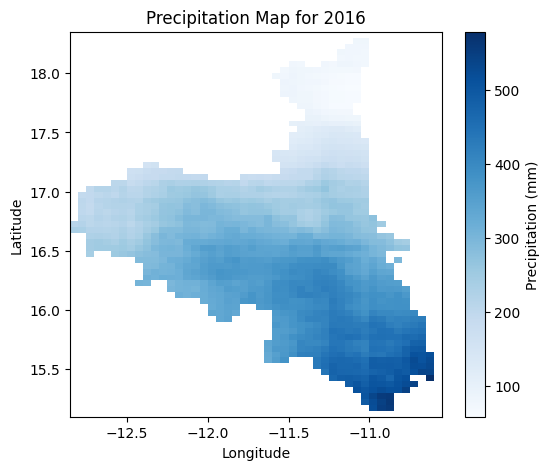

Number of bands: 1
Year: 2017
Min: -3.4028234663852886e+38, Max: 415.6153564453125
Shape of data: (65, 46)

TFW Transform: | 0.05, 0.00,-12.82|
| 0.00,-0.05, 18.32|
| 0.00, 0.00, 1.00|
Rasterio Transform: | 0.05, 0.00,-12.85|
| 0.00,-0.05, 18.35|
| 0.00, 0.00, 1.00|

Extracted Metadata for 2017: {}



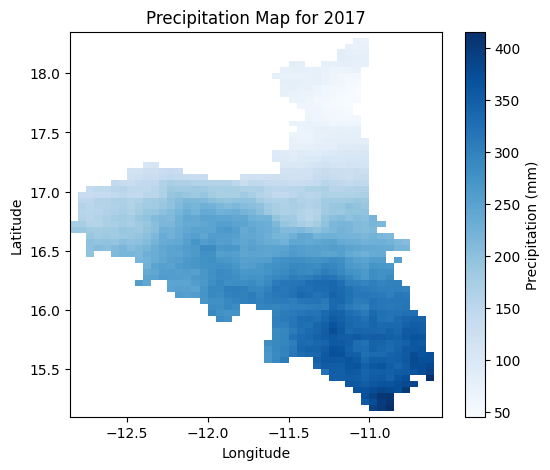

Number of bands: 1
Year: 2018
Min: -3.4028234663852886e+38, Max: 542.1778564453125
Shape of data: (65, 46)

TFW Transform: | 0.05, 0.00,-12.82|
| 0.00,-0.05, 18.32|
| 0.00, 0.00, 1.00|
Rasterio Transform: | 0.05, 0.00,-12.85|
| 0.00,-0.05, 18.35|
| 0.00, 0.00, 1.00|

Extracted Metadata for 2018: {}



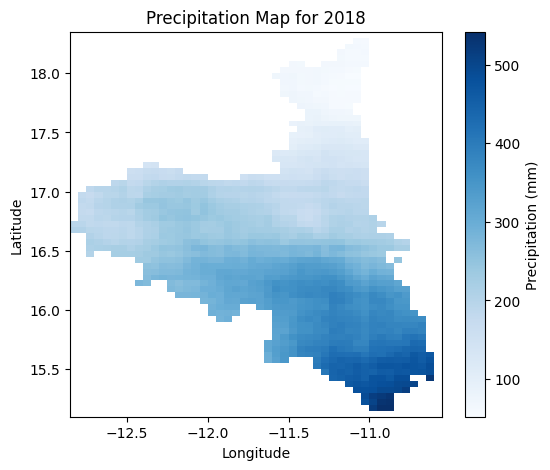

Number of bands: 1
Year: 2019
Min: -3.4028234663852886e+38, Max: 442.896484375
Shape of data: (65, 46)

TFW Transform: | 0.05, 0.00,-12.82|
| 0.00,-0.05, 18.32|
| 0.00, 0.00, 1.00|
Rasterio Transform: | 0.05, 0.00,-12.85|
| 0.00,-0.05, 18.35|
| 0.00, 0.00, 1.00|

Extracted Metadata for 2019: {}



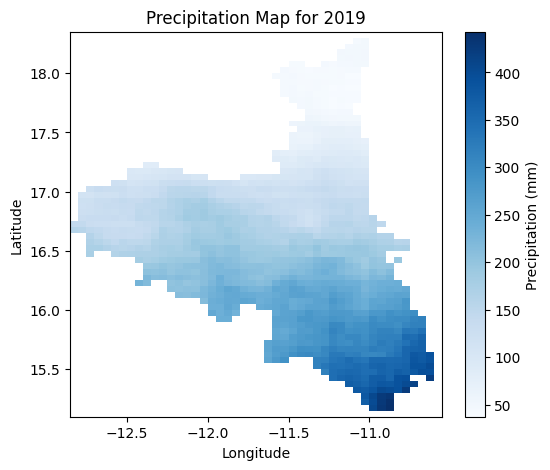

Number of bands: 1
Year: 2020
Min: -3.4028234663852886e+38, Max: 690.9547729492188
Shape of data: (65, 46)

TFW Transform: | 0.05, 0.00,-12.82|
| 0.00,-0.05, 18.32|
| 0.00, 0.00, 1.00|
Rasterio Transform: | 0.05, 0.00,-12.85|
| 0.00,-0.05, 18.35|
| 0.00, 0.00, 1.00|

Extracted Metadata for 2020: {}



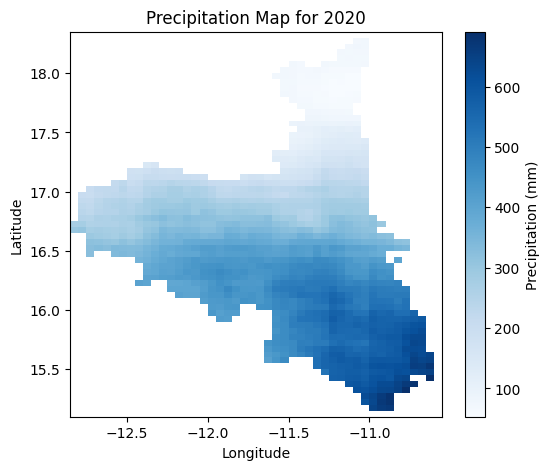

Number of bands: 1
Year: 2021
Min: -3.4028234663852886e+38, Max: 441.8268127441406
Shape of data: (65, 46)

TFW Transform: | 0.05, 0.00,-12.82|
| 0.00,-0.05, 18.32|
| 0.00, 0.00, 1.00|
Rasterio Transform: | 0.05, 0.00,-12.85|
| 0.00,-0.05, 18.35|
| 0.00, 0.00, 1.00|

Extracted Metadata for 2021: {}



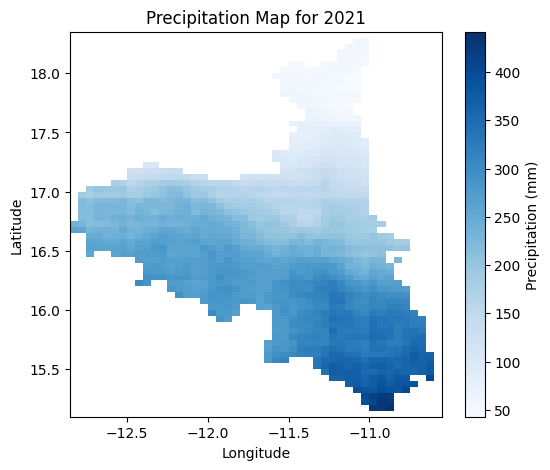

Number of bands: 1
Year: 2022
Min: -3.4028234663852886e+38, Max: 566.6293334960938
Shape of data: (65, 46)

TFW Transform: | 0.05, 0.00,-12.82|
| 0.00,-0.05, 18.32|
| 0.00, 0.00, 1.00|
Rasterio Transform: | 0.05, 0.00,-12.85|
| 0.00,-0.05, 18.35|
| 0.00, 0.00, 1.00|

Extracted Metadata for 2022: {}



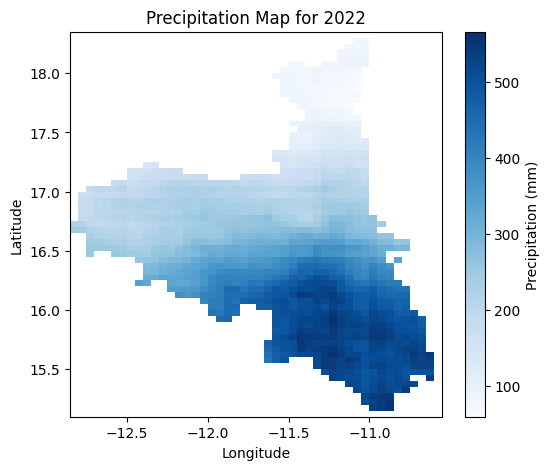

Number of bands: 1
Year: 2023
Min: -3.4028234663852886e+38, Max: 511.3251953125
Shape of data: (65, 46)

TFW Transform: | 0.05, 0.00,-12.82|
| 0.00,-0.05, 18.32|
| 0.00, 0.00, 1.00|
Rasterio Transform: | 0.05, 0.00,-12.85|
| 0.00,-0.05, 18.35|
| 0.00, 0.00, 1.00|

Extracted Metadata for 2023: {}



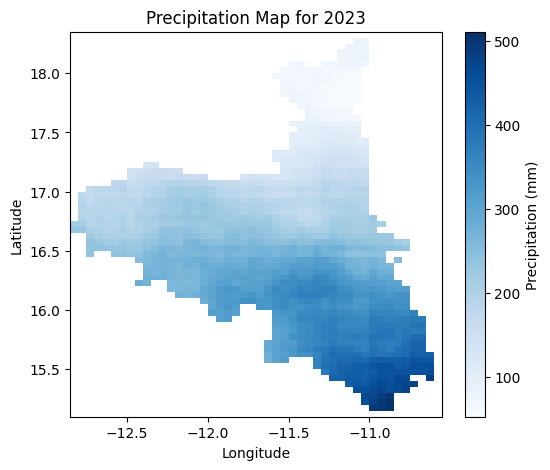

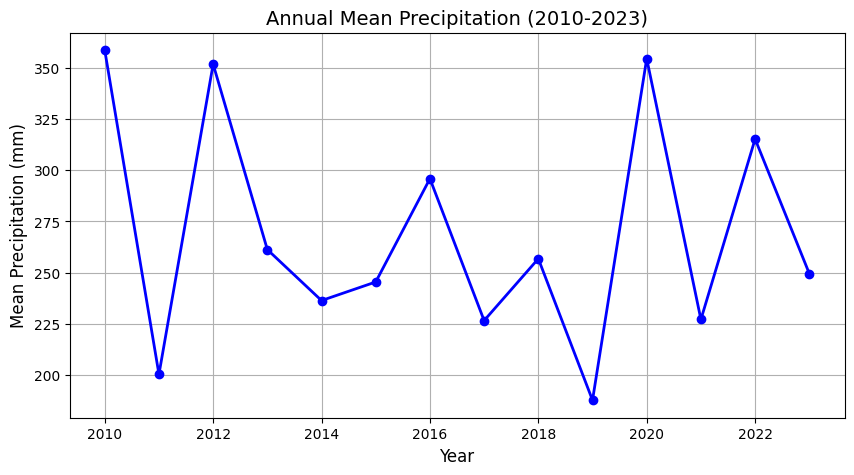

In [168]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from rasterio.transform import xy

# Define dataset path
data_dir = "/Users/niklasviebig/Desktop/STARTxHack/Datasets_Hackathon/Climate_Precipitation_Data"

def read_tfw(tfw_path):
    """Reads a TFW world file and returns transformation parameters."""
    with open(tfw_path, "r") as f:
        lines = f.readlines()
    params = [float(line.strip()) for line in lines]
    
    # Construct affine transformation
    transform = rasterio.transform.Affine(params[0], params[1], params[4],
                                           params[2], params[3], params[5])
    return transform

def read_aux_xml(xml_path):
    """Parses a .tif.aux.xml metadata file and extracts key statistics."""
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    metadata = {}
    for mdi in root.findall(".//MDI"):
        key = mdi.attrib["key"]
        value = mdi.text
        metadata[key] = float(value) if value.replace(".", "", 1).isdigit() else value
    
    return metadata

# Get all .tif files
tif_files = sorted([f for f in os.listdir(data_dir) if f.endswith(".tif")])

data_list = []

for tif in tif_files:
    year = int(tif[:4])  # Extract year from filename
    file_path = os.path.join(data_dir, tif)
    tfw_path = file_path.replace(".tif", ".tfw")
    aux_xml_path = file_path + ".aux.xml"

    with rasterio.open(file_path) as dataset:
        print(f"Number of bands: {dataset.count}")
        data = dataset.read(1)  # Read the first band (2D array)
        transform = dataset.transform  # Get geotransformation matrix from TIFF
        
        # Print basic stats
        print(f"Year: {year}")
        print(f"Min: {np.nanmin(data)}, Max: {np.nanmax(data)}")
        print(f"Shape of data: {data.shape}\n")
        
        # Handle no-data values (-3.4028234663852886e+38)
        no_data_value = dataset.nodata
        if no_data_value is not None:
            data[data == no_data_value] = np.nan  # Convert no-data to NaN

        mean_precip = np.nanmean(data)  # Compute mean precipitation, ignoring NaNs
        data_list.append({"Year": year, "Mean_Precip_mm": mean_precip})
        
        # Compare TFW with Rasterio Transform
        if os.path.exists(tfw_path):
            tfw_transform = read_tfw(tfw_path)
            print(f"TFW Transform: {tfw_transform}")
            print(f"Rasterio Transform: {transform}\n")
        
        # Extract Metadata from .aux.xml
        if os.path.exists(aux_xml_path):
            metadata = read_aux_xml(aux_xml_path)
            print(f"Extracted Metadata for {year}: {metadata}\n")
        
        # Generate latitude & longitude grids
        height, width = data.shape
        row_indices, col_indices = np.meshgrid(np.arange(height), np.arange(width), indexing="ij")
        
        # Convert row/col indices to latitude & longitude
        lon, lat = rasterio.transform.xy(transform, row_indices, col_indices)
        lon = np.array(lon).reshape(data.shape)
        lat = np.array(lat).reshape(data.shape)

        # Visualize each precipitation map with coordinates
        plt.figure(figsize=(6, 5))
        plt.pcolormesh(lon, lat, data, cmap="Blues", shading="auto")
        plt.colorbar(label="Precipitation (mm)")
        plt.title(f"Precipitation Map for {year}")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()

# Convert to DataFrame
precip_df = pd.DataFrame(data_list)

# Plot the mean precipitation over the years
plt.figure(figsize=(10, 5))
plt.plot(precip_df["Year"], precip_df["Mean_Precip_mm"], marker="o", linestyle="-", linewidth=2, color="b")

# Labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mean Precipitation (mm)", fontsize=12)
plt.title("Annual Mean Precipitation (2010-2023)", fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

📂 Processing: 2010
✅ Using TFW Transform for 2010
📊 Metadata Min/Max for 2010: 85.28306579589844, 500.84423828125


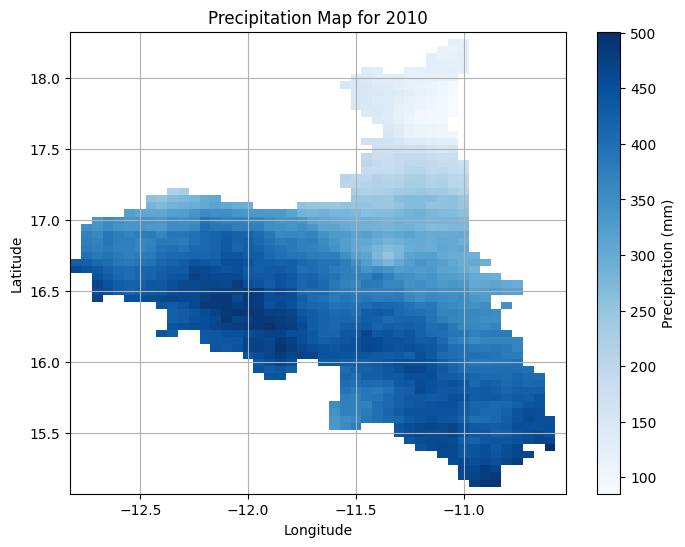

📂 Processing: 2011
✅ Using TFW Transform for 2011
📊 Metadata Min/Max for 2011: 41.76318359375, 367.0052185058594


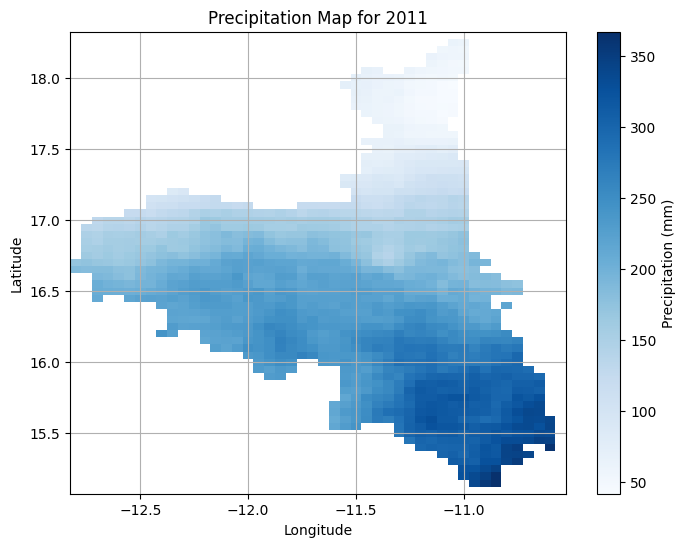

📂 Processing: 2012
✅ Using TFW Transform for 2012
📊 Metadata Min/Max for 2012: 55.94251251220703, 609.3837890625


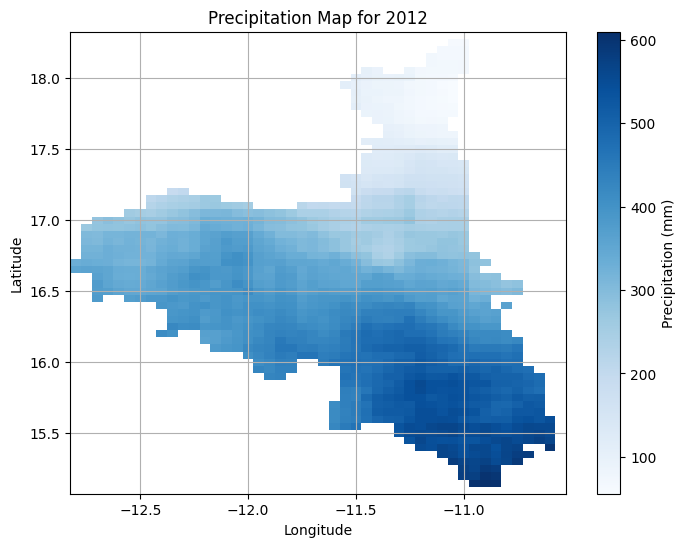

📂 Processing: 2013
✅ Using TFW Transform for 2013
📊 Metadata Min/Max for 2013: 54.33677673339844, 484.1578369140625


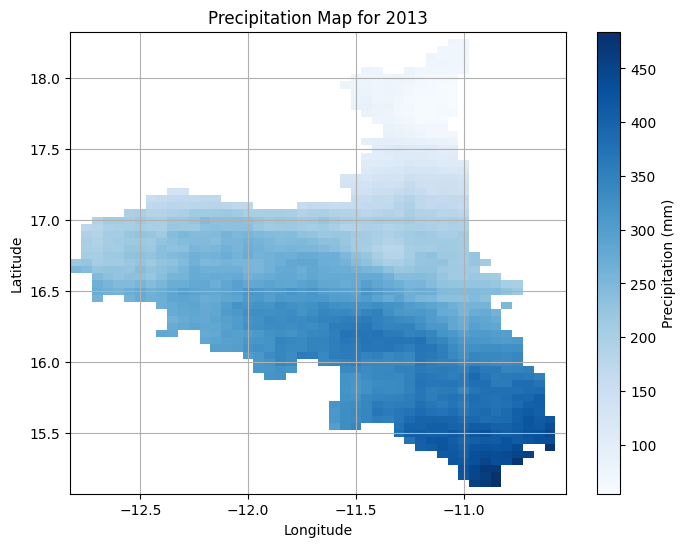

📂 Processing: 2014
✅ Using TFW Transform for 2014
📊 Metadata Min/Max for 2014: 40.55201721191406, 440.318359375


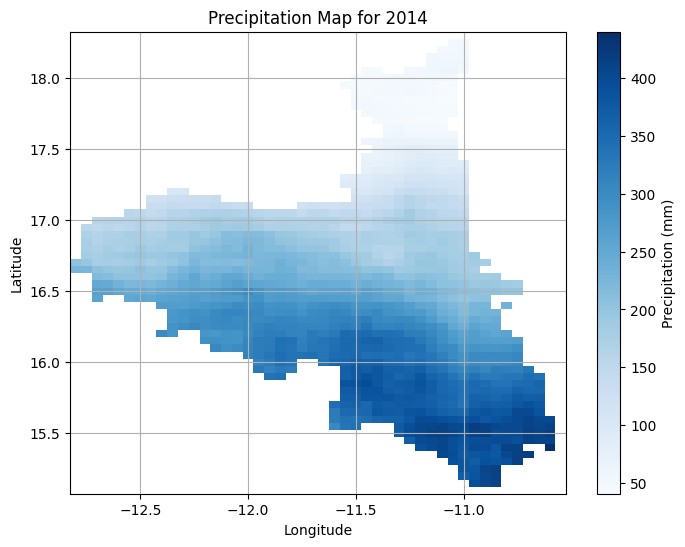

📂 Processing: 2015
✅ Using TFW Transform for 2015
📊 Metadata Min/Max for 2015: 49.812232971191406, 500.3486633300781


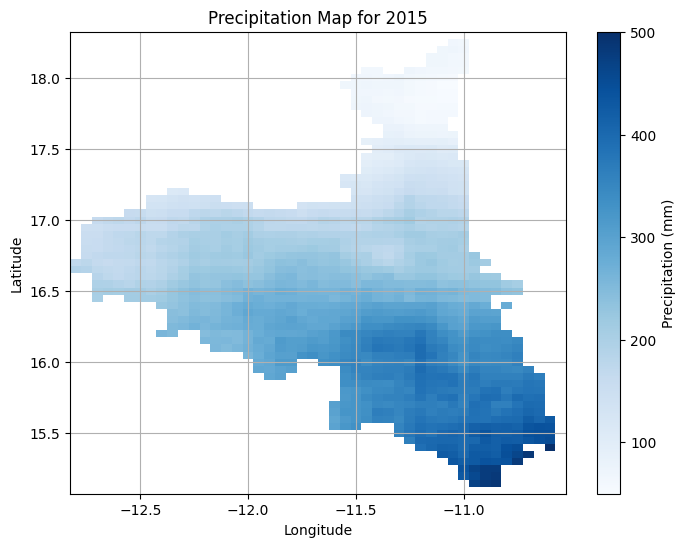

📂 Processing: 2016
✅ Using TFW Transform for 2016
📊 Metadata Min/Max for 2016: 57.87771224975586, 578.6300048828125


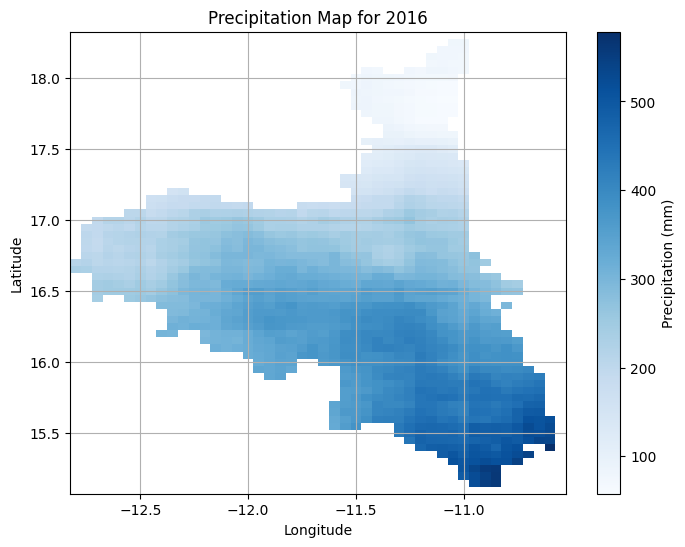

📂 Processing: 2017
✅ Using TFW Transform for 2017
📊 Metadata Min/Max for 2017: 45.17464828491211, 415.6153564453125


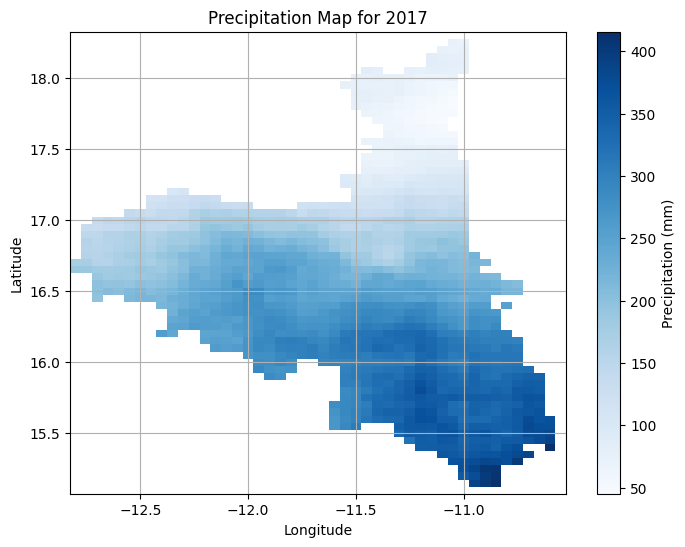

📂 Processing: 2018
✅ Using TFW Transform for 2018
📊 Metadata Min/Max for 2018: 51.86016845703125, 542.1778564453125


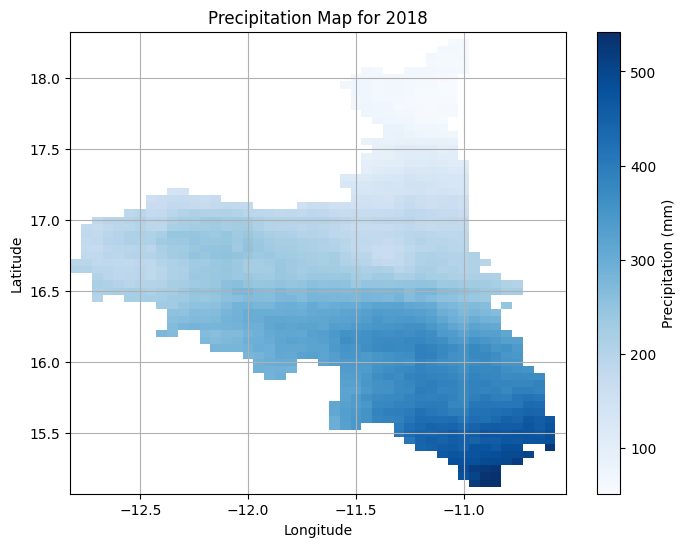

📂 Processing: 2019
✅ Using TFW Transform for 2019
📊 Metadata Min/Max for 2019: 37.214630126953125, 442.896484375


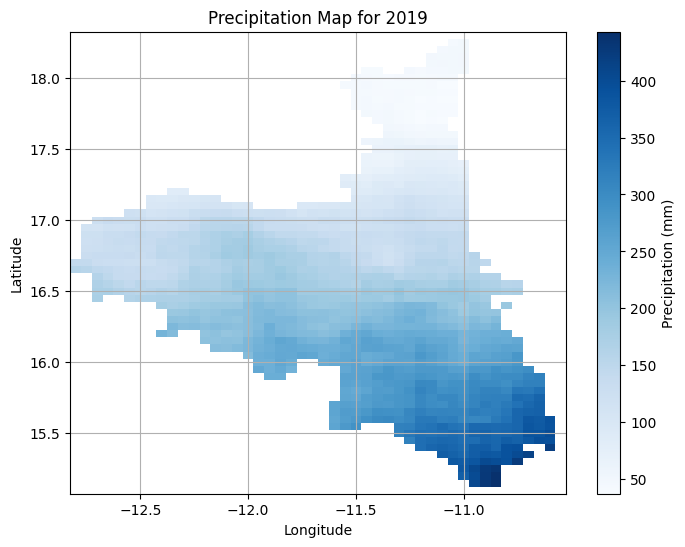

📂 Processing: 2020
✅ Using TFW Transform for 2020
📊 Metadata Min/Max for 2020: 53.078060150146484, 690.9547729492188


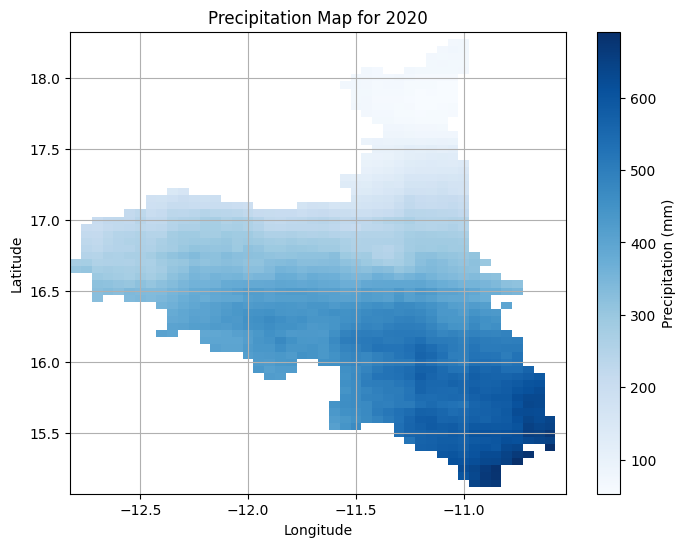

📂 Processing: 2021
✅ Using TFW Transform for 2021
📊 Metadata Min/Max for 2021: 42.87063217163086, 441.8268127441406


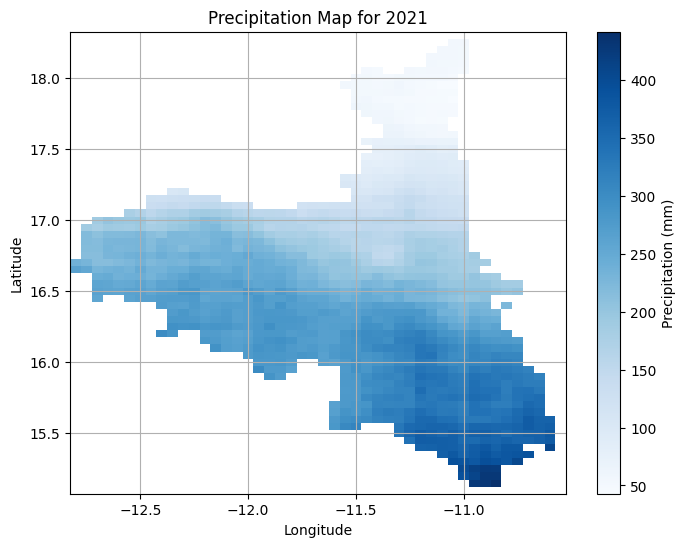

📂 Processing: 2022
✅ Using TFW Transform for 2022
📊 Metadata Min/Max for 2022: 58.835227966308594, 566.6293334960938


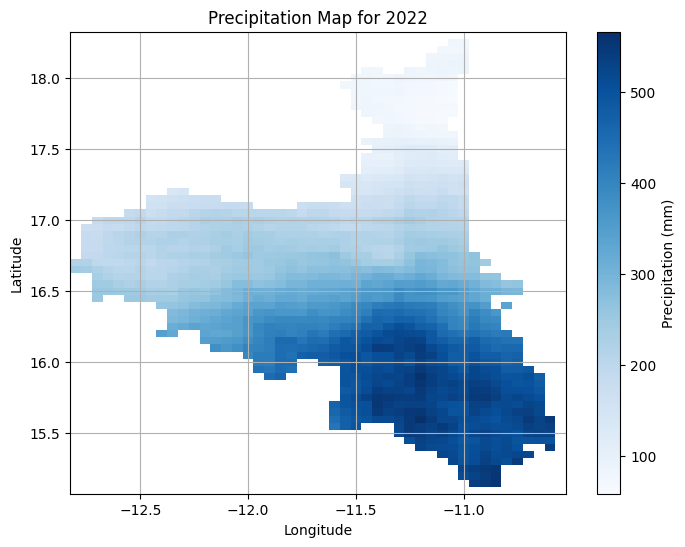

📂 Processing: 2023
✅ Using TFW Transform for 2023
📊 Metadata Min/Max for 2023: 52.85223388671875, 511.3251953125


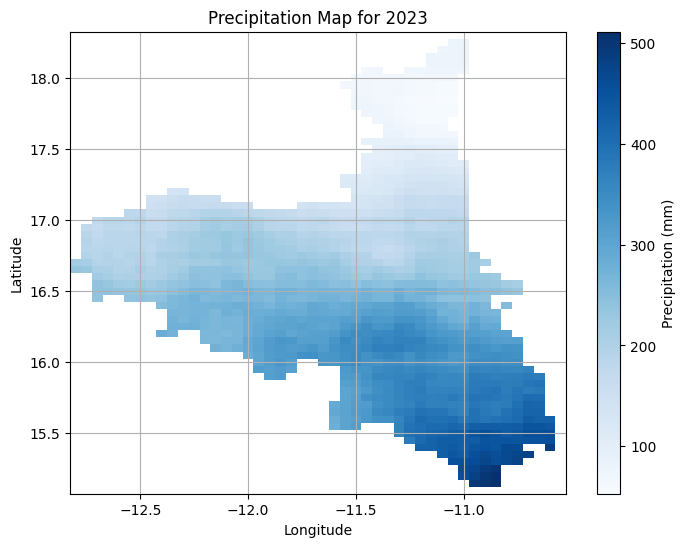

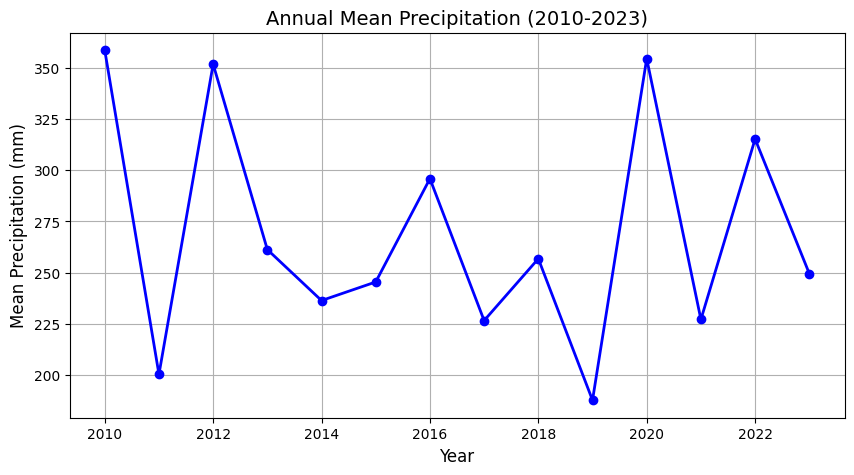

In [169]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from rasterio.transform import xy

# Define dataset path
data_dir = "/Users/niklasviebig/Desktop/STARTxHack/Datasets_Hackathon/Climate_Precipitation_Data"

def read_tfw(tfw_path):
    """Reads a TFW world file and returns transformation parameters."""
    with open(tfw_path, "r") as f:
        lines = f.readlines()
    params = [float(line.strip()) for line in lines]
    
    if len(params) != 6:
        print(f"⚠️ Warning: Incorrect number of parameters in {tfw_path}")
        return None

    # Construct affine transformation
    transform = rasterio.transform.Affine(params[0], params[1], params[4],
                                           params[2], params[3], params[5])
    return transform

def read_aux_xml(xml_path):
    """Parses a .tif.aux.xml metadata file and extracts key statistics."""
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    metadata = {}
    for mdi in root.findall(".//MDI"):
        key = mdi.attrib["key"]
        value = mdi.text
        metadata[key] = float(value) if value.replace(".", "", 1).isdigit() else value
    
    return metadata

# Get all .tif files
tif_files = sorted([f for f in os.listdir(data_dir) if f.endswith(".tif")])

data_list = []

for tif in tif_files:
    year = int(tif[:4])  # Extract year from filename
    file_path = os.path.join(data_dir, tif)
    tfw_path = file_path.replace(".tif", ".tfw")
    aux_xml_path = file_path + ".aux.xml"

    with rasterio.open(file_path) as dataset:
        print(f"📂 Processing: {year}")

        # Read first band
        data = dataset.read(1).astype(float)

        # Extract transformation (TFW if exists)
        if os.path.exists(tfw_path):
            tfw_transform = read_tfw(tfw_path)
            if tfw_transform:
                transform = tfw_transform
                print(f"✅ Using TFW Transform for {year}")
            else:
                transform = dataset.transform
        else:
            transform = dataset.transform

        # Handle no-data values (-3.4028234663852886e+38)
        no_data_value = dataset.nodata
        if no_data_value is not None:
            data[data == no_data_value] = np.nan  # Convert no-data to NaN
        
        # Check for large values
        if np.nanmax(data) > 1e10:
            print(f"⚠️ Warning: Extremely large precipitation values in {year}")

        # Extract Metadata from .aux.xml
        min_val, max_val = np.nanmin(data), np.nanmax(data)  # Default min/max
        if os.path.exists(aux_xml_path):
            metadata = read_aux_xml(aux_xml_path)
            min_val = metadata.get("STATISTICS_MINIMUM", min_val)
            max_val = metadata.get("STATISTICS_MAXIMUM", max_val)
            print(f"📊 Metadata Min/Max for {year}: {min_val}, {max_val}")

        mean_precip = np.nanmean(data)  # Compute mean precipitation
        data_list.append({"Year": year, "Mean_Precip_mm": mean_precip})
        
        # Generate latitude & longitude grids
        height, width = data.shape
        row_indices, col_indices = np.meshgrid(np.arange(height), np.arange(width), indexing="ij")
        
        # Convert row/col indices to latitude & longitude
        lon, lat = rasterio.transform.xy(transform, row_indices, col_indices)
        lon = np.array(lon).reshape(data.shape)
        lat = np.array(lat).reshape(data.shape)

        # **Fix Extreme Values Before Plotting**
        valid_mask = ~np.isnan(data)
        if np.nanmax(data) > 1e5:  # Prevent extreme scales
            print(f"⚠️ Clipping extreme precipitation values for {year}")
            data = np.clip(data, min_val, max_val)

        # Visualize each precipitation map with georeferenced coordinates
        plt.figure(figsize=(8, 6))
        plt.grid()
        plt.pcolormesh(lon, lat, data, cmap="Blues", shading="auto", vmin=min_val, vmax=max_val)
        plt.colorbar(label="Precipitation (mm)")
        plt.title(f"Precipitation Map for {year}")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()

# Convert to DataFrame
precip_df = pd.DataFrame(data_list)

# Plot the mean precipitation over the years
plt.figure(figsize=(10, 5))
plt.plot(precip_df["Year"], precip_df["Mean_Precip_mm"], marker="o", linestyle="-", linewidth=2, color="b")

# Labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mean Precipitation (mm)", fontsize=12)
plt.title("Annual Mean Precipitation (2010-2023)", fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

# Reading in the MODIS Gross Primary production

	1.	.tif (GeoTIFF)
	•	The main raster data file containing the actual satellite-derived values of Gross Primary Production (GPP).
	•	This is the key file you’ll use for visualization.
	2.	.tfw (World File)
	•	A small text file providing georeferencing information for the .tif file.
	•	It defines the pixel size, rotation, and coordinates so GIS software can correctly place the image.
	3.	.aux.xml
	•	An auxiliary metadata file generated by GIS software.
	•	It stores additional information like statistics, projections, and transformation details.
	4.	.vat.cpg
	•	Specifies the character encoding (e.g., UTF-8) for attribute tables associated with the raster data.
	5.	.vat.dbf
	•	A dBase file containing attribute table data for the raster file.
	•	It can store classified values and categories related to the raster.
	6.	.xml
	•	Another metadata file containing structured information about the raster dataset.
	7.	.sr.lock
	•	A system lock file generated by GIS software when the dataset is in use.
	•	It ensures data consistency and should not be manually modified.

1. What is GPP?
	•	Definition: GPP measures the total amount of carbon dioxide (CO₂) absorbed by vegetation through photosynthesis over a given time period.
	•	Units: The data is typically in kg_C/m²/year, meaning kilograms of carbon per square meter per year.
	•	Why it matters: It reflects plant growth, carbon sequestration, and overall ecosystem health.

In [170]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import geopandas as gpd

# Set the directory where the 2023 GPP files are stored
data_dir = "/Users/niklasviebig/Desktop/STARTxHack/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP"

# Define the base filename for 2023
year = 2023
base_filename = f"{year}_GP"

# Define file paths
tif_path = os.path.join(data_dir, f"{base_filename}.tif")
tfw_path = os.path.join(data_dir, f"{base_filename}.tfw")
aux_xml_path = os.path.join(data_dir, f"{base_filename}.tif.aux.xml")
cpg_path = os.path.join(data_dir, f"{base_filename}.tif.vat.cpg")
dbf_path = os.path.join(data_dir, f"{base_filename}.tif.vat.dbf")
xml_path = os.path.join(data_dir, f"{base_filename}.tif.xml")
lock_path = os.path.join(data_dir, f"{base_filename}.tif.vat.dbf.UNCCD-B4H5HX3.21848.22788.sr.lock")

In [171]:
# Open the raster file
with rasterio.open(tif_path) as dataset:
    metadata = dataset.meta  # Get metadata dictionary
    tags = dataset.tags()  # Extract metadata tags (extra info)
    
    print("📜 **Raster Metadata:**")
    for key, value in metadata.items():
        print(f"   - {key}: {value}")
    
    print("\n🔍 **Additional Metadata Tags:**")
    for key, value in tags.items():
        print(f"   - {key}: {value}")

📜 **Raster Metadata:**
   - driver: GTiff
   - dtype: uint16
   - nodata: 65535.0
   - width: 565
   - height: 769
   - count: 1
   - crs: PROJCS["unnamed",GEOGCS["GCS_Unknown_datum_based_upon_the_custom_spheroid",DATUM["D_Not_specified_based_on_custom_spheroid",SPHEROID["Custom_spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
   - transform: | 463.31, 0.00,-1378818.64|
| 0.00,-463.31, 2036259.39|
| 0.00, 0.00, 1.00|

🔍 **Additional Metadata Tags:**
   - TIFFTAG_SOFTWARE: GDAL 3.9.2e (3090211) (4.6.0;1710;3.0.3;2.1.6;;0x10400;5.4.7;4.0.0;), PROJ 9.4.1 (EPSG.VERSION=v11.006;EPSG.DATE=2024-03-13;ESRI.VERSION=ArcGIS Pro 3.3;ESRI.DATE=2024-05-07;PROJ_DATA.VERSION=1.18;)
   - AREA_OR_POINT: Area


In [172]:
import xml.etree.ElementTree as ET
import os

def read_aux_xml(xml_path):
    """Parses a .tif.aux.xml metadata file and extracts key statistics and scale factors."""
    if not os.path.exists(xml_path):
        print("⚠️ No .aux.xml file found.")
        return {}

    tree = ET.parse(xml_path)
    root = tree.getroot()

    metadata = {}
    for mdi in root.findall(".//MDI"):
        key = mdi.attrib["key"]
        value = mdi.text

        if value and value.replace(".", "", 1).isdigit():
            metadata[key] = float(value)
        else:
            metadata[key] = value  # Keep as string if not numeric

    print("\n📜 **Extracted Metadata from .aux.xml:**")
    for key, value in metadata.items():
        print(f"   - {key}: {value}")

    return metadata

# Define the .aux.xml file path
aux_xml_path = tif_path + ".aux.xml"

# Read metadata from the .aux.xml file
aux_metadata = read_aux_xml(aux_xml_path)


📜 **Extracted Metadata from .aux.xml:**
   - STATISTICS_MINIMUM: 233.0
   - STATISTICS_MAXIMUM: 65533.0
   - STATISTICS_MEAN: 24178.581409174
   - STATISTICS_STDDEV: 30856.379770238
   - STATISTICS_MEDIAN: nan
   - STATISTICS_COUNT: 168212.0
   - STATISTICS_SKIPFACTORX: 1.0
   - STATISTICS_SKIPFACTORY: 1.0
   - STATISTICS_EXCLUDEDVALUES: None


In [173]:
import geopandas as gpd

# Define the .vat.dbf file path
dbf_path = tif_path.replace(".tif", ".tif.vat.dbf")

if os.path.exists(dbf_path):
    dbf_data = gpd.read_file(dbf_path)
    print("\n📊 **DBF Attribute Table Data:**")
    print(dbf_data.head())  # Show first few rows
else:
    print("⚠️ No .vat.dbf file found.")


📊 **DBF Attribute Table Data:**
   Value  Count
0    233    3.0
1    234    6.0
2    235    1.0
3    238    3.0
4    239    8.0


In [174]:
# Open the raster file
with rasterio.open(tif_path) as dataset:
    # Check the number of bands
    num_bands = dataset.count
    print(f"📸 The raster has {num_bands} band(s)")

    # Ensure there's only one band
    if num_bands != 1:
        print("⚠️ Warning: More than one band detected! You may need to specify which band to read.")

    # Read the first band
    gpp_data = dataset.read(1).astype(float)  # Convert to float for NaN handling
    no_data_value = dataset.nodatavals[0]  # Get No-Data value
    transform = dataset.transform  # Georeferencing info

    # Mask No-Data values
    gpp_data[gpp_data == no_data_value] = np.nan

    # Compute statistics
    min_gpp = np.nanmin(gpp_data)
    max_gpp = np.nanmax(gpp_data)
    mean_gpp = np.nanmean(gpp_data)
    std_gpp = np.nanstd(gpp_data)

    print(f"📊 **GPP Statistics for {year}**")
    print(f"   - Min GPP: {min_gpp:.2f} kg_C/m²/year")
    print(f"   - Max GPP: {max_gpp:.2f} kg_C/m²/year")
    print(f"   - Mean GPP: {mean_gpp:.2f} kg_C/m²/year")
    print(f"   - Standard Deviation: {std_gpp:.2f}")

📸 The raster has 1 band(s)
📊 **GPP Statistics for 2023**
   - Min GPP: 233.00 kg_C/m²/year
   - Max GPP: 65533.00 kg_C/m²/year
   - Mean GPP: 24178.58 kg_C/m²/year
   - Standard Deviation: 30856.29


In [175]:
def read_tfw(tfw_path):
    """Reads a TFW world file and returns transformation parameters."""
    if not os.path.exists(tfw_path):
        print("⚠️ No .tfw file found.")
        return None

    with open(tfw_path, "r") as f:
        lines = f.readlines()
    params = [float(line.strip()) for line in lines]

    if len(params) != 6:
        print(f"⚠️ Warning: Incorrect number of parameters in {tfw_path}")
        return None

    # Construct affine transformation
    transform = rasterio.transform.Affine(params[0], params[1], params[4],
                                           params[2], params[3], params[5])
    print(f"✅ Loaded World File (.tfw): {params}")
    return transform

tfw_transform = read_tfw(tfw_path)

✅ Loaded World File (.tfw): [463.3127165275, 0.0, 0.0, -463.3127165275, -1378586.9880285764, 2036027.7327810985]


In [176]:
def read_aux_xml(xml_path):
    """Parses a .tif.aux.xml metadata file and extracts key statistics."""
    if not os.path.exists(xml_path):
        print("⚠️ No .aux.xml file found.")
        return {}

    tree = ET.parse(xml_path)
    root = tree.getroot()

    metadata = {}
    for mdi in root.findall(".//MDI"):
        key = mdi.attrib["key"]
        value = mdi.text  # Might be None

        if value is not None:
            # Convert numerical values safely
            try:
                metadata[key] = float(value) if value.replace(".", "", 1).isdigit() else value
            except ValueError:
                metadata[key] = value  # Keep as string if conversion fails

    print("📜 **Extracted Metadata from .aux.xml:**")
    for k, v in metadata.items():
        print(f"   - {k}: {v}")

    return metadata

# Try parsing the .aux.xml file
aux_metadata = read_aux_xml(aux_xml_path)

📜 **Extracted Metadata from .aux.xml:**
   - STATISTICS_MINIMUM: 233.0
   - STATISTICS_MAXIMUM: 65533.0
   - STATISTICS_MEAN: 24178.581409174
   - STATISTICS_STDDEV: 30856.379770238
   - STATISTICS_MEDIAN: nan
   - STATISTICS_COUNT: 168212.0
   - STATISTICS_SKIPFACTORX: 1.0
   - STATISTICS_SKIPFACTORY: 1.0


In [177]:
if os.path.exists(dbf_path):
    dbf_data = gpd.read_file(dbf_path)
    print("📊 **DBF Attribute Table Data:**")
    print(dbf_data.head())  # Display first few rows
else:
    print("⚠️ No .vat.dbf file found.")

📊 **DBF Attribute Table Data:**
   Value  Count
0    233    3.0
1    234    6.0
2    235    1.0
3    238    3.0
4    239    8.0


In [178]:
if os.path.exists(cpg_path):
    with open(cpg_path, "r") as f:
        encoding = f.readline().strip()
    print(f"📝 Encoding from .vat.cpg: {encoding}")
else:
    print("⚠️ No .vat.cpg file found.")

📝 Encoding from .vat.cpg: UTF-8


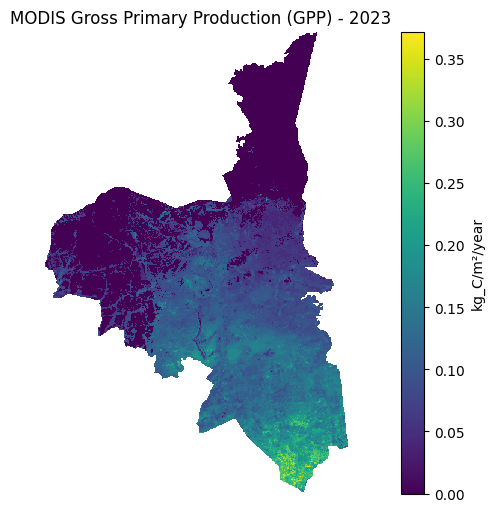

In [179]:
# Remove all data over 4000 (set to NaN)
gpp_data[gpp_data > 4000] = 0

gpp_data *= 0.0001  # Convert to kg_C/m²/year, https://lpdaac.usgs.gov/products/mod17a2hv006/

# Plot the GPP data
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(gpp_data, cmap="viridis", interpolation="nearest")
ax.set_title(f"MODIS Gross Primary Production (GPP) - {year}")
ax.axis("off")

# Add a colorbar
cbar = fig.colorbar(cax, ax=ax, orientation="vertical", label="kg_C/m²/year")
plt.show()

In [ ]:
if os.path.exists(dbf_path):
    dbf_data = gpd.read_file(dbf_path)
    print("📊 **DBF Attribute Table Data:**")
    print(dbf_data.head())  # Display first few rows
else:
    print("⚠️ No .vat.dbf file found.")

if os.path.exists(cpg_path):
    with open(cpg_path, "r") as f:
        encoding = f.readline().strip()
    print(f"📝 Encoding from .vat.cpg: {encoding}")
else:
    print("⚠️ No .vat.cpg file found.")

# Remove all data over 4000 (set to NaN)
gpp_data[gpp_data > 4000] = 0

gpp_data *= 0.0001  # Convert to kg_C/m²/year, https://lpdaac.usgs.gov/products/mod17a2hv006/

# Plot the GPP data
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(gpp_data, cmap="viridis", interpolation="nearest")
ax.set_title(f"MODIS Gross Primary Production (GPP) - {year}")
ax.axis("off")

# Add a colorbar
cbar = fig.colorbar(cax, ax=ax, orientation="vertical", label="kg_C/m²/year")
plt.show()

# Using Shapefile to divide Assaba in municipalities

   FID_1    ADM3_EN ADM3_PCODE ADM3_REF    ADM2_EN ADM2_PCODE ADM1_EN  \
0     71  El Ghabra    MR03106     None    Barkéol      MR031  Assaba   
1     77     Guerou    MR03301     None     Guerou      MR033  Assaba   
2     66  Barkeiwel    MR03101     None    Barkéol      MR031  Assaba   
3     91    Legrane    MR03506     None      Kiffa      MR035  Assaba   
4     82       Sani    MR03402     None  Kankoussa      MR034  Assaba   

  ADM1_PCODE     ADM0_EN ADM0_PCODE       date    validOn     validTo  \
0       MR03  Mauritania         MR 2024-03-06 2024-03-27  0000/00/00   
1       MR03  Mauritania         MR 2024-03-06 2024-03-27  0000/00/00   
2       MR03  Mauritania         MR 2024-03-06 2024-03-27  0000/00/00   
3       MR03  Mauritania         MR 2024-03-06 2024-03-27  0000/00/00   
4       MR03  Mauritania         MR 2024-03-06 2024-03-27  0000/00/00   

   Shape_Leng  Shape_Area    AREA_SQKM  \
0    1.064756    0.047306   558.684431   
1    0.466595    0.009926   117.075519

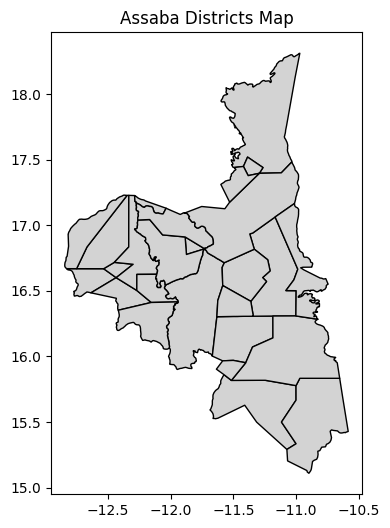

In [180]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Define the path to your shapefile
shp_path = "/Users/niklasviebig/Desktop/STARTxHack/Datasets_Hackathon/Admin_layers/Assaba_Districts_layer.shp"

# Load the shapefile
assaba_map = gpd.read_file(shp_path)

# Print basic info
print(assaba_map.head())  # Check the first few rows of the attribute table
print("\n📌 Coordinate Reference System (CRS):", assaba_map.crs)

# Plot the Assaba map
fig, ax = plt.subplots(figsize=(8, 6))
assaba_map.plot(ax=ax, color="lightgray", edgecolor="black")
ax.set_title("Assaba Districts Map")
plt.show()

📊 Available columns in the shapefile: Index(['FID_1', 'ADM3_EN', 'ADM3_PCODE', 'ADM3_REF', 'ADM2_EN', 'ADM2_PCODE',
       'ADM1_EN', 'ADM1_PCODE', 'ADM0_EN', 'ADM0_PCODE', 'date', 'validOn',
       'validTo', 'Shape_Leng', 'Shape_Area', 'AREA_SQKM', 'geometry'],
      dtype='object')


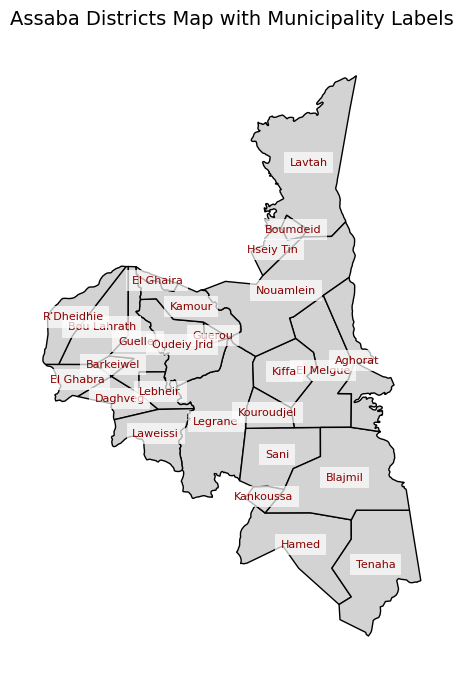

In [184]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Define the path to your shapefile
shp_path = "/Users/niklasviebig/Desktop/STARTxHack/Datasets_Hackathon/Admin_layers/Assaba_Districts_layer.shp"

# Load the shapefile
assaba_map = gpd.read_file(shp_path)

# Print available columns (to confirm correct municipality column)
print("📊 Available columns in the shapefile:", assaba_map.columns)

# **Fix 1: Use Correct Municipality Column Name**
municipality_column = "ADM3_EN"  # Change if needed

# **Fix 2: Ensure the CRS is projected before calculating centroids**
if assaba_map.crs.is_geographic:
    assaba_map = assaba_map.to_crs(epsg=3857)  # Convert to a projected CRS

# Compute centroids for labeling
assaba_map["centroid"] = assaba_map.geometry.centroid

# Extract coordinates
x_coords = assaba_map["centroid"].x
y_coords = assaba_map["centroid"].y

# **Fix 3: Plot the Map with Labels**
fig, ax = plt.subplots(figsize=(10, 8))
assaba_map.plot(ax=ax, color="lightgray", edgecolor="black")

# Add labels (municipality names)
for x, y, label in zip(x_coords, y_coords, assaba_map[municipality_column]):
    ax.text(x, y, label, fontsize=8, ha="center", va="center", color="darkred",
            bbox=dict(facecolor="white", edgecolor="none", alpha=0.7))

# Improve visualization
ax.set_title("Assaba Districts Map with Municipality Labels", fontsize=14)
ax.axis("off")

# Show plot
plt.show()

In [185]:
assaba_map

,FID_1,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry,centroid
0,71,El Ghabra,MR03106,None,Barkéol,MR031,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,1.064756,0.047306,558.684431,"POLYGON ((-1384010.912 1874341.081, -1406390.5...",POINT (-1406731.431 1872462.351)
1,77,Guerou,MR03301,None,Guerou,MR033,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,0.466595,0.009926,117.075519,"POLYGON ((-1306437.631 1899661.698, -1321743.7...",POINT (-1316753.903 1901758.815)
2,66,Barkeiwel,MR03101,None,Barkéol,MR031,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,0.539027,0.013975,164.969406,"POLYGON ((-1388548.437 1877579.041, -1395131.1...",POINT (-1382872.936 1882324.355)
3,91,Legrane,MR03506,None,Kiffa,MR035,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,2.794763,0.269195,3183.059156,"POLYGON ((-1294952.382 1838163.549, -1298814.3...",POINT (-1314506.844 1844088.643)
4,82,Sani,MR03402,None,Kankoussa,MR034,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,1.498810,0.131890,1560.970072,"POLYGON ((-1245122.592 1838163.549, -1245077.3...",POINT (-1273862.106 1822513.138)
5,70,Daghveg,MR03105,None,Barkéol,MR031,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,1.144794,0.052128,615.973072,"POLYGON ((-1388548.437 1857093.157, -1406390.5...",POINT (-1378679.663 1859590.662)
6,73,Bou Lahrath,MR03108,None,Barkéol,MR031,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,1.576497,0.115752,1364.926800,"POLYGON ((-1392614.169 1883776.016, -1395131.1...",POINT (-1390487.791 1907192.222)
7,85,Hamed,MR03405,None,Kankoussa,MR034,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,2.321192,0.199741,2369.935558,"POLYGON ((-1237199.443 1747210.036, -1237485.5...",POINT (-1258317.506 1762681.016)
8,67,Gueller,MR03102,None,Barkéol,MR031,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,2.242961,0.094691,1117.064669,"POLYGON ((-1345872.456 1889885.884, -1345832.8...",POINT (-1366268.599 1897340.693)
9,89,El Melgue,MR03504,None,Kiffa,MR035,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,2.258042,0.184686,2180.571391,"POLYGON ((-1260801.45 1840246.102, -1262482.30...",POINT (-1243392.241 1878211.205)


/var/folders/dm/_7xx464s467cm2g79s2z8cvw0000gq/T/ipykernel_11483/519237863.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  assaba_map["centroid"] = assaba_map.geometry.centroid


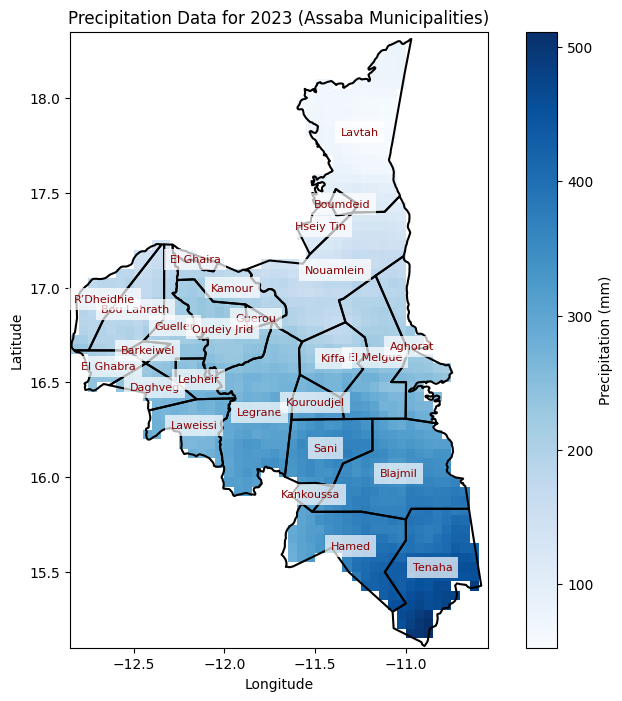

In [203]:
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.mask import mask
from shapely.geometry import mapping

# Define file paths
tif_file = "/Users/niklasviebig/Desktop/STARTxHack/Datasets_Hackathon/Climate_Precipitation_Data/2023R.tif"  # Update with actual file path
shp_file = "/Users/niklasviebig/Desktop/STARTxHack/Datasets_Hackathon/Admin_layers/Assaba_Districts_layer.shp"  # Update with actual file path

# Load the Assaba municipality shapefile
assaba_map = gpd.read_file(shp_file)

# Open the raster dataset and extract metadata
with rasterio.open(tif_file) as dataset:
    raster_crs = dataset.crs  # Get raster projection
    transform = dataset.transform  # Get geotransform

    # Read raster and convert to float for NaN handling
    data = dataset.read(1).astype(float)
    data[data == dataset.nodata] = np.nan  # Mask nodata values

# Ensure Assaba shapefile CRS matches the raster CRS
assaba_map = assaba_map.to_crs(raster_crs)

# Mask and crop raster data to the municipality boundaries
with rasterio.open(tif_file) as dataset:
    clipped_data, clipped_transform = mask(dataset, assaba_map.geometry.map(mapping), crop=True)

# Convert NoData values (masked) to NaN for visualization
clipped_data = clipped_data.astype(float)
clipped_data[clipped_data == dataset.nodata] = np.nan

# Convert row/col to lat/lon using georeferencing for clipped data
height, width = clipped_data.shape[1:]
row_indices, col_indices = np.meshgrid(np.arange(height), np.arange(width), indexing="ij")
lon, lat = rasterio.transform.xy(clipped_transform, row_indices, col_indices)
lon = np.array(lon).reshape(clipped_data.shape[1:])
lat = np.array(lat).reshape(clipped_data.shape[1:])

# Generate centroid for labeling
assaba_map["centroid"] = assaba_map.geometry.centroid
municipality_column = "ADM3_EN"  # Adjust if necessary

# **Plot the clipped precipitation data with municipalities**
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.pcolormesh(lon, lat, clipped_data[0], cmap="Blues", shading="auto")  # Use lat/lon for scaling
plt.colorbar(im, ax=ax, label="Precipitation (mm)")

# Overlay municipality borders
assaba_map.boundary.plot(ax=ax, edgecolor="black", linewidth=1.5)

# Add municipality labels at their centroids
for x, y, label in zip(assaba_map["centroid"].x, assaba_map["centroid"].y, assaba_map[municipality_column]):
    ax.text(
        x, y, label, fontsize=8, ha="center", va="center", 
        color="darkred", bbox=dict(facecolor="white", edgecolor="none", alpha=0.7)
    )

# Final plot enhancements
ax.set_title("Precipitation Data for 2023 (Assaba Municipalities)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the updated map
plt.show()

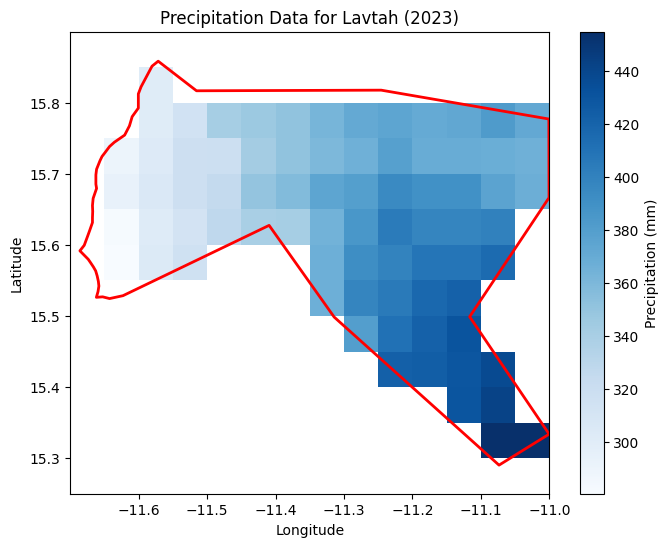

In [205]:
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.mask import mask
from shapely.geometry import mapping

# Define file paths
tif_file = "/Users/niklasviebig/Desktop/STARTxHack/Datasets_Hackathon/Climate_Precipitation_Data/2023R.tif"  # Update with actual file path
shp_file = "/Users/niklasviebig/Desktop/STARTxHack/Datasets_Hackathon/Admin_layers/Assaba_Districts_layer.shp"  # Update with actual file path


# Load the Assaba shapefile
assaba_map = gpd.read_file(shp_file)

# 🔹 **Step 1: Select only the "Lavtah" region**
lavtah_map = assaba_map[assaba_map["ADM3_EN"] == "Hamed"]  # Change if name differs

# 🔹 **Step 2: Ensure CRS matches raster**
with rasterio.open(tif_file) as dataset:
    raster_crs = dataset.crs  # Get raster projection
    lavtah_map = lavtah_map.to_crs(raster_crs)  # Reproject Lavtah region to match raster CRS

    # 🔹 **Step 3: Clip the raster to Lavtah region**
    clipped_data, clipped_transform = mask(dataset, lavtah_map.geometry.map(mapping), crop=True, nodata=np.nan)

# 🔹 **Step 4: Convert row/col to lat/lon for correct plotting**
height, width = clipped_data.shape[1:]
row_indices, col_indices = np.meshgrid(np.arange(height), np.arange(width), indexing="ij")
lon, lat = rasterio.transform.xy(clipped_transform, row_indices, col_indices)
lon = np.array(lon).reshape(clipped_data.shape[1:])
lat = np.array(lat).reshape(clipped_data.shape[1:])

# 🔹 **Step 5: Plot the clipped precipitation data**
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.pcolormesh(lon, lat, clipped_data[0], cmap="Blues", shading="auto")
plt.colorbar(im, ax=ax, label="Precipitation (mm)")

# 🔹 **Step 6: Overlay Lavtah boundary**
lavtah_map.boundary.plot(ax=ax, edgecolor="red", linewidth=2)

# **Final tweaks**
ax.set_title("Precipitation Data for Lavtah (2023)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()